In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv("CHD_preprocessed.csv")
data.columns = ['Sex','Age','Education','CurrentSmoker','CigsPerDay','BPMeds','PrevalentStroke','PrevalentHyp','Diabetes','TotChol','SysBP','DiaBP','BMI','HeartRate','Glucose','TenYearCHD']
data.head()

,Sex,Age,Education,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data = data.drop(columns=['Education'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 15 columns):
Sex                4133 non-null int64
Age                4133 non-null int64
CurrentSmoker      4133 non-null int64
CigsPerDay         4133 non-null float64
BPMeds             4133 non-null float64
PrevalentStroke    4133 non-null int64
PrevalentHyp       4133 non-null int64
Diabetes           4133 non-null int64
TotChol            4133 non-null float64
SysBP              4133 non-null float64
DiaBP              4133 non-null float64
BMI                4133 non-null float64
HeartRate          4133 non-null float64
Glucose            4133 non-null float64
TenYearCHD         4133 non-null int64
dtypes: float64(8), int64(7)
memory usage: 484.5 KB


In [6]:
data.isnull().sum()

Sex                0
Age                0
CurrentSmoker      0
CigsPerDay         0
BPMeds             0
PrevalentStroke    0
PrevalentHyp       0
Diabetes           0
TotChol            0
SysBP              0
DiaBP              0
BMI                0
HeartRate          0
Glucose            0
TenYearCHD         0
dtype: int64

In [7]:
l = ['CigsPerDay', 'BPMeds', 'TotChol', 'HeartRate', 'BMI', 'Glucose', 'PrevalentStroke', 'Diabetes',
    'SysBP', 'DiaBP']
for i in l:
    data[i] = data[i].replace(np.nan, data[i].mean())

In [8]:
data.isnull().sum()

Sex                0
Age                0
CurrentSmoker      0
CigsPerDay         0
BPMeds             0
PrevalentStroke    0
PrevalentHyp       0
Diabetes           0
TotChol            0
SysBP              0
DiaBP              0
BMI                0
HeartRate          0
Glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

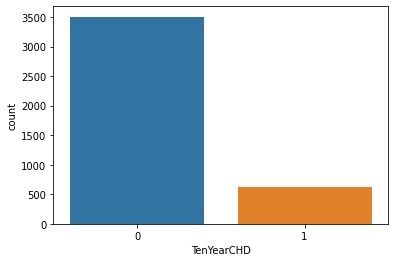

In [9]:
sns.countplot(x=data['TenYearCHD'])

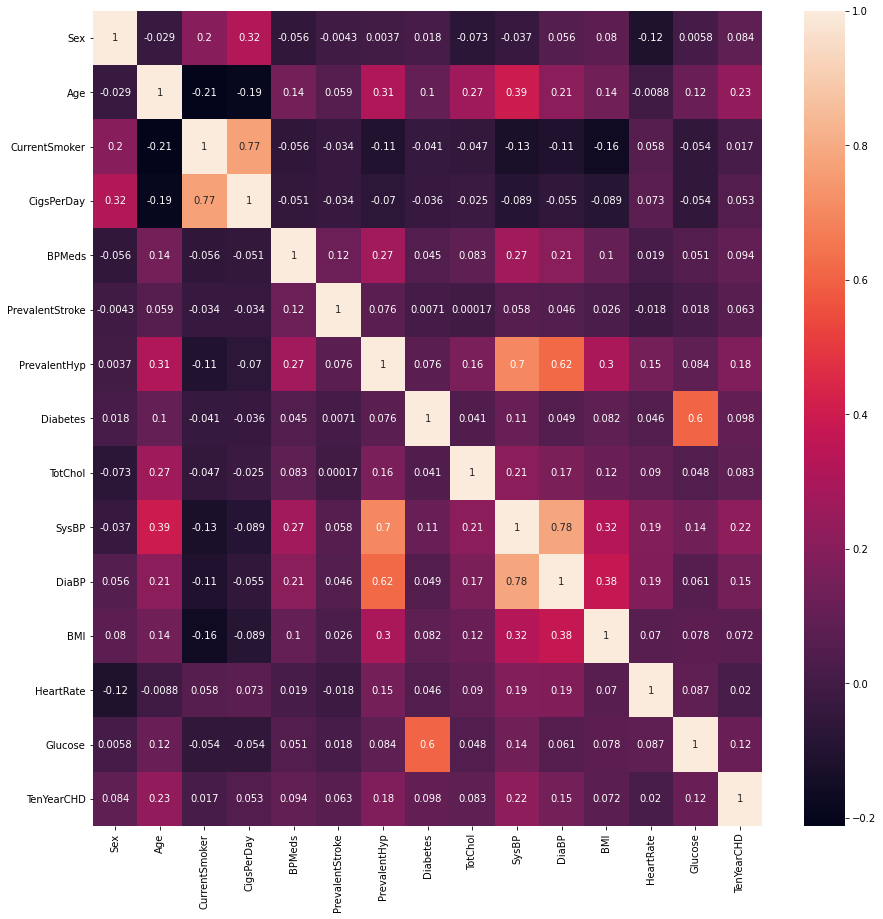

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [11]:
q1 = data.drop('TenYearCHD', axis = 1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
q3 = data.drop('TenYearCHD', axis = 1).quantile(0.75)

# calculate of interquartile range 
IQR = q3 - q1

LL = q1 - 1.5 * IQR
UL = q3 + 1.5 * IQR

data = data[~((data < LL) | (data > UL)).any(axis = 1)]

In [12]:
data.shape

(3435, 15)

In [13]:
X = data.drop(["TenYearCHD"],axis =1)
y = data["TenYearCHD"]

In [14]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy = 'minority', random_state = 1)
X, y = oversample.fit_resample(X, y)

In [15]:
X = X.drop(['BPMeds', 'PrevalentStroke', 'Diabetes'], axis = 1)

In [17]:
X.columns

Index(['Sex', 'Age', 'CurrentSmoker', 'CigsPerDay', 'PrevalentHyp', 'TotChol',
       'SysBP', 'DiaBP', 'BMI', 'HeartRate', 'Glucose'],
      dtype='object')

In [18]:
df = data[['Sex', 'Age', 'CurrentSmoker', 'CigsPerDay', 'PrevalentHyp', 'TotChol',
       'SysBP', 'DiaBP', 'BMI', 'HeartRate', 'Glucose','TenYearCHD']]
df.to_csv('processed.csv')

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4790, 11), (4790,), (1198, 11), (1198,))

In [17]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
auprc = []
auroc = []
mcc = []
sens = []
spec = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g,h,i):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auprc.append(round(e, 3))
    auroc.append(round(f, 3))
    mcc.append(round(g, 3))
    sens.append(round(h, 3))
    spec.append(round(i, 3))

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, matthews_corrcoef, confusion_matrix

# AdaBoost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier

# instantiate the model 
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

# fit the model 
ab.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = ab.predict(X_test)

confusion = confusion_matrix(y_pred, y_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

ab_acc = accuracy_score(y_pred, y_test)
ab_prec = precision_score(y_pred, y_test)
ab_rec = recall_score(y_pred, y_test)
ab_f1 = f1_score(y_pred, y_test)
ab_auprc = average_precision_score(y_pred, y_test)
ab_auroc = roc_auc_score(y_test, ab.predict_proba(X_test)[:, 1])
ab_mcc = matthews_corrcoef(y_pred, y_test)

ab_sens = TP / (TP + FN)
ab_spec = TN / (TN + FP)

storeResults('AdaBoost Classifier',ab_acc,ab_prec,ab_rec,ab_f1,ab_auprc,ab_auroc,ab_mcc,ab_sens,ab_spec)

In [20]:
ab_acc

0.7579298831385642

# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = tree.predict(X_test)

confusion = confusion_matrix(y_pred, y_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test)
dt_rec = recall_score(y_pred, y_test)
dt_f1 = f1_score(y_pred, y_test)
dt_auprc = average_precision_score(y_pred, y_test)
dt_auroc = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])
dt_mcc = matthews_corrcoef(y_pred, y_test)

dt_sens = TP / (TP + FN)
dt_spec = TN / (TN + FP)

storeResults('Decision Tree Classifier',dt_acc,dt_prec,dt_rec,dt_f1,dt_auprc,dt_auroc,dt_mcc,dt_sens,dt_spec)

# Bagging Classifier

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# instantiate the model 
clf = BaggingClassifier(SVC(),n_estimators=10, random_state=0)

# fit the model 
clf.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = clf.predict(X_test)

confusion = confusion_matrix(y_pred, y_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

bg_acc = accuracy_score(y_pred, y_test)
bg_prec = precision_score(y_pred, y_test)
bg_rec = recall_score(y_pred, y_test)
bg_f1 = f1_score(y_pred, y_test)
bg_auprc = average_precision_score(y_pred, y_test)
bg_auroc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
bg_mcc = matthews_corrcoef(y_pred, y_test)

bg_sens = TP / (TP + FN)
bg_spec = TN / (TN + FP)

storeResults('Bagging Classifier',bg_acc,bg_prec,bg_rec,bg_f1,bg_auprc,bg_auroc,bg_mcc,bg_sens,bg_spec)

# Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model 
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

# fit the model 
gbm.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = gbm.predict(X_test)

confusion = confusion_matrix(y_pred, y_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

gb_acc = accuracy_score(y_pred, y_test)
gb_prec = precision_score(y_pred, y_test)
gb_rec = recall_score(y_pred, y_test)
gb_f1 = f1_score(y_pred, y_test)
gb_auprc = average_precision_score(y_pred, y_test)
gb_auroc = roc_auc_score(y_test, gbm.predict_proba(X_test)[:, 1])
gb_mcc = matthews_corrcoef(y_pred, y_test)

gb_sens = TP / (TP + FN)
gb_spec = TN / (TN + FP)

storeResults('Gradient Boosting Classifier',gb_acc,gb_prec,gb_rec,gb_f1,gb_auprc,gb_auroc,gb_mcc,gb_sens,gb_spec)

# XGBoost

In [24]:
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = xgb.predict(X_test)

confusion = confusion_matrix(y_pred, y_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test)
xgb_rec = recall_score(y_pred, y_test)
xgb_f1 = f1_score(y_pred, y_test)
xgb_auprc = average_precision_score(y_pred, y_test)
xgb_auroc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
xgb_mcc = matthews_corrcoef(y_pred, y_test)

xgb_sens = TP / (TP + FN)
xgb_spec = TN / (TN + FP)

storeResults('XGBoost Classifier',xgb_acc,xgb_prec,xgb_rec,xgb_f1,xgb_auprc,xgb_auroc,xgb_mcc,xgb_sens,xgb_spec)

# CatBoost

In [25]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

# fit the model 
clf.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = clf.predict(X_test)

confusion = confusion_matrix(y_pred, y_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

cat_acc = accuracy_score(y_pred, y_test)
cat_prec = precision_score(y_pred, y_test)
cat_rec = recall_score(y_pred, y_test)
cat_f1 = f1_score(y_pred, y_test)
cat_auprc = average_precision_score(y_pred, y_test)
cat_auroc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
cat_mcc = matthews_corrcoef(y_pred, y_test)

cat_sens = TP / (TP + FN)
cat_spec = TN / (TN + FP)

storeResults('CatBoost Classifier',cat_acc,cat_prec,cat_rec,cat_f1,cat_auprc,cat_auroc,cat_mcc,cat_sens,cat_spec)

0:	learn: 0.6783127	total: 133ms	remaining: 532ms
1:	learn: 0.6620612	total: 134ms	remaining: 202ms
2:	learn: 0.6504584	total: 136ms	remaining: 90.4ms
3:	learn: 0.6396822	total: 137ms	remaining: 34.1ms
4:	learn: 0.6292837	total: 138ms	remaining: 0us


# LightGBM

In [26]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(boosting_type='gbdt',verbosity=1,metric='auc',objctive='binary',num_threads = 10000,force_row_wise=True)
clf.fit(X_train, y_train, verbose=0)

y_pred = clf.predict(X_test)

confusion = confusion_matrix(y_pred, y_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

lgb_acc = accuracy_score(y_pred, y_test)
lgb_prec = precision_score(y_pred, y_test)
lgb_rec = recall_score(y_pred, y_test)
lgb_f1 = f1_score(y_pred, y_test)
lgb_auprc = average_precision_score(y_pred, y_test)
lgb_auroc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
lgb_mcc = matthews_corrcoef(y_pred, y_test)

lgb_sens = TP / (TP + FN)
lgb_spec = TN / (TN + FP)

storeResults('LightGBM w/o Focal Loss',lgb_acc,lgb_prec,lgb_rec,lgb_f1,lgb_auprc,lgb_auroc,lgb_mcc,lgb_sens,lgb_spec)

[LightGBM] [Warning] Unknown parameter: objctive
[LightGBM] [Warning] num_threads is set=10000, n_jobs=-1 will be ignored. Current value: num_threads=10000
[LightGBM] [Warning] Unknown parameter: objctive
[LightGBM] [Warning] num_threads is set=10000, n_jobs=-1 will be ignored. Current value: num_threads=10000
[LightGBM] [Info] Number of positive: 2389, number of negative: 2401
[LightGBM] [Info] Total Bins 1825
[LightGBM] [Info] Number of data points in the train set: 4790, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498747 -> initscore=-0.005010
[LightGBM] [Info] Start training from score -0.005010


In [27]:
lgb_acc

0.8956594323873122

# LightGBM with Focal Loss

In [28]:
from scipy.misc import derivative

def focal_loss(ytrue, ypred, gamma=2.0):   
    p = 1 / (1 + np.exp(-ypred))
    loss = -(1 - ytrue) * p**gamma * np.log(1 - p) - ytrue * (1 - p)**gamma * np.log(p)
    return loss


def focal_loss_metric(ytrue, ypred):
    return 'focal_loss_metric', np.mean(focal_loss(ytrue, ypred)), False


def focal_loss_objective(ytrue, ypred):
    func = lambda z: focal_loss(ytrue, z)
    grad = derivative(func, ypred, n=1, dx=1e-6)
    hess = derivative(func, ypred, n=2, dx=1e-6)
    return grad, hess

In [29]:
gbm_focal_loss = lgb.LGBMClassifier(objective=focal_loss_objective, learning_rate=0.25, n_estimators=16000, max_depth=1,boosting_type='gbdt',verbosity=1,metric='auc',num_threads = 100,force_row_wise=True)
gbm_focal_loss.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric=focal_loss_metric)

[LightGBM] [Warning] num_threads is set=100, n_jobs=-1 will be ignored. Current value: num_threads=100
[LightGBM] [Warning] num_threads is set=100, n_jobs=-1 will be ignored. Current value: num_threads=100
[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Info] Total Bins 1825
[LightGBM] [Info] Number of data points in the train set: 4790, number of used features: 11
[LightGBM] [Warning] num_threads is set=100, n_jobs=-1 will be ignored. Current value: num_threads=100
[LightGBM] [Warning] Using self-defined objective function
[1]	valid_0's auc: 0.624735	valid_0's focal_loss_metric: 0.169657
[2]	valid_0's auc: 0.626041	valid_0's focal_loss_metric: 0.1679
[3]	valid_0's auc: 0.642174	valid_0's focal_loss_metric: 0.16647
[4]	valid_0's auc: 0.662995	valid_0's focal_loss_metric: 0.165512
[5]	valid_0's auc: 0.678515	valid_0's focal_loss_metric: 0.164234
[6]	valid_0's auc: 0.68145	valid_0's focal_loss_metric: 0.163288
[7]	valid_0's auc: 0.692601	valid_0's focal_loss_metric

[158]	valid_0's auc: 0.803052	valid_0's focal_loss_metric: 0.139292
[159]	valid_0's auc: 0.803091	valid_0's focal_loss_metric: 0.139254
[160]	valid_0's auc: 0.80361	valid_0's focal_loss_metric: 0.139154
[161]	valid_0's auc: 0.804393	valid_0's focal_loss_metric: 0.139014
[162]	valid_0's auc: 0.804766	valid_0's focal_loss_metric: 0.138919
[163]	valid_0's auc: 0.804945	valid_0's focal_loss_metric: 0.138886
[164]	valid_0's auc: 0.804195	valid_0's focal_loss_metric: 0.138858
[165]	valid_0's auc: 0.803366	valid_0's focal_loss_metric: 0.138865
[166]	valid_0's auc: 0.804001	valid_0's focal_loss_metric: 0.138837
[167]	valid_0's auc: 0.803775	valid_0's focal_loss_metric: 0.13875
[168]	valid_0's auc: 0.80375	valid_0's focal_loss_metric: 0.138741
[169]	valid_0's auc: 0.804063	valid_0's focal_loss_metric: 0.138698
[170]	valid_0's auc: 0.804205	valid_0's focal_loss_metric: 0.138626
[171]	valid_0's auc: 0.804662	valid_0's focal_loss_metric: 0.138595
[172]	valid_0's auc: 0.805197	valid_0's focal_loss_

[317]	valid_0's auc: 0.83547	valid_0's focal_loss_metric: 0.130875
[318]	valid_0's auc: 0.835955	valid_0's focal_loss_metric: 0.130787
[319]	valid_0's auc: 0.835969	valid_0's focal_loss_metric: 0.130778
[320]	valid_0's auc: 0.836373	valid_0's focal_loss_metric: 0.130695
[321]	valid_0's auc: 0.836376	valid_0's focal_loss_metric: 0.130687
[322]	valid_0's auc: 0.836541	valid_0's focal_loss_metric: 0.130642
[323]	valid_0's auc: 0.836543	valid_0's focal_loss_metric: 0.130623
[324]	valid_0's auc: 0.836789	valid_0's focal_loss_metric: 0.130541
[325]	valid_0's auc: 0.837134	valid_0's focal_loss_metric: 0.130473
[326]	valid_0's auc: 0.836836	valid_0's focal_loss_metric: 0.130508
[327]	valid_0's auc: 0.836768	valid_0's focal_loss_metric: 0.130545
[328]	valid_0's auc: 0.836818	valid_0's focal_loss_metric: 0.130477
[329]	valid_0's auc: 0.837122	valid_0's focal_loss_metric: 0.130472
[330]	valid_0's auc: 0.837256	valid_0's focal_loss_metric: 0.13037
[331]	valid_0's auc: 0.837359	valid_0's focal_loss

[478]	valid_0's auc: 0.853265	valid_0's focal_loss_metric: 0.1255
[479]	valid_0's auc: 0.853577	valid_0's focal_loss_metric: 0.125441
[480]	valid_0's auc: 0.853608	valid_0's focal_loss_metric: 0.125477
[481]	valid_0's auc: 0.853566	valid_0's focal_loss_metric: 0.12543
[482]	valid_0's auc: 0.853541	valid_0's focal_loss_metric: 0.125429
[483]	valid_0's auc: 0.853365	valid_0's focal_loss_metric: 0.125426
[484]	valid_0's auc: 0.853248	valid_0's focal_loss_metric: 0.125403
[485]	valid_0's auc: 0.85356	valid_0's focal_loss_metric: 0.125379
[486]	valid_0's auc: 0.853571	valid_0's focal_loss_metric: 0.125337
[487]	valid_0's auc: 0.853761	valid_0's focal_loss_metric: 0.125334
[488]	valid_0's auc: 0.8539	valid_0's focal_loss_metric: 0.125274
[489]	valid_0's auc: 0.854196	valid_0's focal_loss_metric: 0.125227
[490]	valid_0's auc: 0.854012	valid_0's focal_loss_metric: 0.125228
[491]	valid_0's auc: 0.854575	valid_0's focal_loss_metric: 0.125163
[492]	valid_0's auc: 0.854229	valid_0's focal_loss_met

[639]	valid_0's auc: 0.863337	valid_0's focal_loss_metric: 0.121864
[640]	valid_0's auc: 0.863342	valid_0's focal_loss_metric: 0.121837
[641]	valid_0's auc: 0.863367	valid_0's focal_loss_metric: 0.121833
[642]	valid_0's auc: 0.86332	valid_0's focal_loss_metric: 0.121816
[643]	valid_0's auc: 0.863535	valid_0's focal_loss_metric: 0.121793
[644]	valid_0's auc: 0.863484	valid_0's focal_loss_metric: 0.121762
[645]	valid_0's auc: 0.863663	valid_0's focal_loss_metric: 0.121758
[646]	valid_0's auc: 0.863638	valid_0's focal_loss_metric: 0.121726
[647]	valid_0's auc: 0.863827	valid_0's focal_loss_metric: 0.121706
[648]	valid_0's auc: 0.863844	valid_0's focal_loss_metric: 0.121688
[649]	valid_0's auc: 0.863944	valid_0's focal_loss_metric: 0.121685
[650]	valid_0's auc: 0.863975	valid_0's focal_loss_metric: 0.121653
[651]	valid_0's auc: 0.86412	valid_0's focal_loss_metric: 0.121633
[652]	valid_0's auc: 0.864287	valid_0's focal_loss_metric: 0.121585
[653]	valid_0's auc: 0.864424	valid_0's focal_loss

[798]	valid_0's auc: 0.871841	valid_0's focal_loss_metric: 0.118997
[799]	valid_0's auc: 0.871699	valid_0's focal_loss_metric: 0.118996
[800]	valid_0's auc: 0.871612	valid_0's focal_loss_metric: 0.119032
[801]	valid_0's auc: 0.871724	valid_0's focal_loss_metric: 0.11898
[802]	valid_0's auc: 0.871816	valid_0's focal_loss_metric: 0.118984
[803]	valid_0's auc: 0.871704	valid_0's focal_loss_metric: 0.118983
[804]	valid_0's auc: 0.87166	valid_0's focal_loss_metric: 0.119005
[805]	valid_0's auc: 0.871866	valid_0's focal_loss_metric: 0.118959
[806]	valid_0's auc: 0.872008	valid_0's focal_loss_metric: 0.118894
[807]	valid_0's auc: 0.872108	valid_0's focal_loss_metric: 0.118891
[808]	valid_0's auc: 0.87198	valid_0's focal_loss_metric: 0.118868
[809]	valid_0's auc: 0.872212	valid_0's focal_loss_metric: 0.118837
[810]	valid_0's auc: 0.872122	valid_0's focal_loss_metric: 0.118835
[811]	valid_0's auc: 0.872334	valid_0's focal_loss_metric: 0.118805
[812]	valid_0's auc: 0.872206	valid_0's focal_loss_

[958]	valid_0's auc: 0.877889	valid_0's focal_loss_metric: 0.116671
[959]	valid_0's auc: 0.877836	valid_0's focal_loss_metric: 0.116671
[960]	valid_0's auc: 0.87797	valid_0's focal_loss_metric: 0.116643
[961]	valid_0's auc: 0.877906	valid_0's focal_loss_metric: 0.116643
[962]	valid_0's auc: 0.878065	valid_0's focal_loss_metric: 0.116615
[963]	valid_0's auc: 0.877995	valid_0's focal_loss_metric: 0.116616
[964]	valid_0's auc: 0.878168	valid_0's focal_loss_metric: 0.116589
[965]	valid_0's auc: 0.87814	valid_0's focal_loss_metric: 0.116571
[966]	valid_0's auc: 0.878199	valid_0's focal_loss_metric: 0.116569
[967]	valid_0's auc: 0.878207	valid_0's focal_loss_metric: 0.116543
[968]	valid_0's auc: 0.878255	valid_0's focal_loss_metric: 0.116531
[969]	valid_0's auc: 0.878107	valid_0's focal_loss_metric: 0.116541
[970]	valid_0's auc: 0.878101	valid_0's focal_loss_metric: 0.116566
[971]	valid_0's auc: 0.878207	valid_0's focal_loss_metric: 0.116502
[972]	valid_0's auc: 0.878149	valid_0's focal_loss

[1119]	valid_0's auc: 0.881761	valid_0's focal_loss_metric: 0.114934
[1120]	valid_0's auc: 0.881906	valid_0's focal_loss_metric: 0.114895
[1121]	valid_0's auc: 0.881953	valid_0's focal_loss_metric: 0.114885
[1122]	valid_0's auc: 0.882006	valid_0's focal_loss_metric: 0.114861
[1123]	valid_0's auc: 0.882037	valid_0's focal_loss_metric: 0.11486
[1124]	valid_0's auc: 0.882009	valid_0's focal_loss_metric: 0.114862
[1125]	valid_0's auc: 0.882123	valid_0's focal_loss_metric: 0.114835
[1126]	valid_0's auc: 0.882129	valid_0's focal_loss_metric: 0.114817
[1127]	valid_0's auc: 0.882096	valid_0's focal_loss_metric: 0.11484
[1128]	valid_0's auc: 0.882207	valid_0's focal_loss_metric: 0.114798
[1129]	valid_0's auc: 0.882271	valid_0's focal_loss_metric: 0.114773
[1130]	valid_0's auc: 0.882268	valid_0's focal_loss_metric: 0.114774
[1131]	valid_0's auc: 0.882327	valid_0's focal_loss_metric: 0.114749
[1132]	valid_0's auc: 0.882341	valid_0's focal_loss_metric: 0.11475
[1133]	valid_0's auc: 0.882413	valid_

[1278]	valid_0's auc: 0.885627	valid_0's focal_loss_metric: 0.113204
[1279]	valid_0's auc: 0.885669	valid_0's focal_loss_metric: 0.11318
[1280]	valid_0's auc: 0.885713	valid_0's focal_loss_metric: 0.113163
[1281]	valid_0's auc: 0.885794	valid_0's focal_loss_metric: 0.113159
[1282]	valid_0's auc: 0.885817	valid_0's focal_loss_metric: 0.113141
[1283]	valid_0's auc: 0.885872	valid_0's focal_loss_metric: 0.113136
[1284]	valid_0's auc: 0.885819	valid_0's focal_loss_metric: 0.113131
[1285]	valid_0's auc: 0.885895	valid_0's focal_loss_metric: 0.11312
[1286]	valid_0's auc: 0.885842	valid_0's focal_loss_metric: 0.113114
[1287]	valid_0's auc: 0.885928	valid_0's focal_loss_metric: 0.11311
[1288]	valid_0's auc: 0.885936	valid_0's focal_loss_metric: 0.113094
[1289]	valid_0's auc: 0.885903	valid_0's focal_loss_metric: 0.113098
[1290]	valid_0's auc: 0.886054	valid_0's focal_loss_metric: 0.113067
[1291]	valid_0's auc: 0.885936	valid_0's focal_loss_metric: 0.113087
[1292]	valid_0's auc: 0.886015	valid_

[1440]	valid_0's auc: 0.888944	valid_0's focal_loss_metric: 0.111814
[1441]	valid_0's auc: 0.889042	valid_0's focal_loss_metric: 0.111798
[1442]	valid_0's auc: 0.889025	valid_0's focal_loss_metric: 0.111794
[1443]	valid_0's auc: 0.889081	valid_0's focal_loss_metric: 0.111785
[1444]	valid_0's auc: 0.889036	valid_0's focal_loss_metric: 0.111782
[1445]	valid_0's auc: 0.889075	valid_0's focal_loss_metric: 0.111774
[1446]	valid_0's auc: 0.889047	valid_0's focal_loss_metric: 0.111769
[1447]	valid_0's auc: 0.889125	valid_0's focal_loss_metric: 0.111746
[1448]	valid_0's auc: 0.889095	valid_0's focal_loss_metric: 0.111741
[1449]	valid_0's auc: 0.889156	valid_0's focal_loss_metric: 0.111734
[1450]	valid_0's auc: 0.889081	valid_0's focal_loss_metric: 0.11173
[1451]	valid_0's auc: 0.889145	valid_0's focal_loss_metric: 0.111723
[1452]	valid_0's auc: 0.889117	valid_0's focal_loss_metric: 0.111718
[1453]	valid_0's auc: 0.889178	valid_0's focal_loss_metric: 0.111696
[1454]	valid_0's auc: 0.889145	vali

[1599]	valid_0's auc: 0.892222	valid_0's focal_loss_metric: 0.110439
[1600]	valid_0's auc: 0.892083	valid_0's focal_loss_metric: 0.110468
[1601]	valid_0's auc: 0.892202	valid_0's focal_loss_metric: 0.110437
[1602]	valid_0's auc: 0.892152	valid_0's focal_loss_metric: 0.110448
[1603]	valid_0's auc: 0.892216	valid_0's focal_loss_metric: 0.110425
[1604]	valid_0's auc: 0.892113	valid_0's focal_loss_metric: 0.110447
[1605]	valid_0's auc: 0.892292	valid_0's focal_loss_metric: 0.110403
[1606]	valid_0's auc: 0.892225	valid_0's focal_loss_metric: 0.110415
[1607]	valid_0's auc: 0.8923	valid_0's focal_loss_metric: 0.110391
[1608]	valid_0's auc: 0.8923	valid_0's focal_loss_metric: 0.110387
[1609]	valid_0's auc: 0.892336	valid_0's focal_loss_metric: 0.110367
[1610]	valid_0's auc: 0.892319	valid_0's focal_loss_metric: 0.110368
[1611]	valid_0's auc: 0.892409	valid_0's focal_loss_metric: 0.110343
[1612]	valid_0's auc: 0.892367	valid_0's focal_loss_metric: 0.110355
[1613]	valid_0's auc: 0.892439	valid_0

[1760]	valid_0's auc: 0.89465	valid_0's focal_loss_metric: 0.109269
[1761]	valid_0's auc: 0.894641	valid_0's focal_loss_metric: 0.109246
[1762]	valid_0's auc: 0.894678	valid_0's focal_loss_metric: 0.109244
[1763]	valid_0's auc: 0.894658	valid_0's focal_loss_metric: 0.109243
[1764]	valid_0's auc: 0.894658	valid_0's focal_loss_metric: 0.109238
[1765]	valid_0's auc: 0.894555	valid_0's focal_loss_metric: 0.109264
[1766]	valid_0's auc: 0.894747	valid_0's focal_loss_metric: 0.109228
[1767]	valid_0's auc: 0.894611	valid_0's focal_loss_metric: 0.109245
[1768]	valid_0's auc: 0.894719	valid_0's focal_loss_metric: 0.109216
[1769]	valid_0's auc: 0.894678	valid_0's focal_loss_metric: 0.109225
[1770]	valid_0's auc: 0.894753	valid_0's focal_loss_metric: 0.109206
[1771]	valid_0's auc: 0.894767	valid_0's focal_loss_metric: 0.109184
[1772]	valid_0's auc: 0.89475	valid_0's focal_loss_metric: 0.10919
[1773]	valid_0's auc: 0.894795	valid_0's focal_loss_metric: 0.109166
[1774]	valid_0's auc: 0.894803	valid_

[1921]	valid_0's auc: 0.897334	valid_0's focal_loss_metric: 0.10814
[1922]	valid_0's auc: 0.897292	valid_0's focal_loss_metric: 0.108139
[1923]	valid_0's auc: 0.897314	valid_0's focal_loss_metric: 0.108132
[1924]	valid_0's auc: 0.897298	valid_0's focal_loss_metric: 0.10813
[1925]	valid_0's auc: 0.897337	valid_0's focal_loss_metric: 0.108123
[1926]	valid_0's auc: 0.897314	valid_0's focal_loss_metric: 0.108121
[1927]	valid_0's auc: 0.897384	valid_0's focal_loss_metric: 0.108102
[1928]	valid_0's auc: 0.897342	valid_0's focal_loss_metric: 0.108101
[1929]	valid_0's auc: 0.897406	valid_0's focal_loss_metric: 0.108094
[1930]	valid_0's auc: 0.897334	valid_0's focal_loss_metric: 0.108093
[1931]	valid_0's auc: 0.89739	valid_0's focal_loss_metric: 0.108086
[1932]	valid_0's auc: 0.897356	valid_0's focal_loss_metric: 0.108085
[1933]	valid_0's auc: 0.897292	valid_0's focal_loss_metric: 0.108097
[1934]	valid_0's auc: 0.897367	valid_0's focal_loss_metric: 0.108078
[1935]	valid_0's auc: 0.897314	valid_

[2082]	valid_0's auc: 0.898951	valid_0's focal_loss_metric: 0.107252
[2083]	valid_0's auc: 0.898864	valid_0's focal_loss_metric: 0.107272
[2084]	valid_0's auc: 0.898998	valid_0's focal_loss_metric: 0.107231
[2085]	valid_0's auc: 0.898914	valid_0's focal_loss_metric: 0.10725
[2086]	valid_0's auc: 0.899031	valid_0's focal_loss_metric: 0.10721
[2087]	valid_0's auc: 0.898959	valid_0's focal_loss_metric: 0.107229
[2088]	valid_0's auc: 0.899023	valid_0's focal_loss_metric: 0.107202
[2089]	valid_0's auc: 0.898953	valid_0's focal_loss_metric: 0.107224
[2090]	valid_0's auc: 0.898931	valid_0's focal_loss_metric: 0.107222
[2091]	valid_0's auc: 0.898981	valid_0's focal_loss_metric: 0.107191
[2092]	valid_0's auc: 0.898939	valid_0's focal_loss_metric: 0.107202
[2093]	valid_0's auc: 0.898992	valid_0's focal_loss_metric: 0.107173
[2094]	valid_0's auc: 0.898939	valid_0's focal_loss_metric: 0.10719
[2095]	valid_0's auc: 0.89899	valid_0's focal_loss_metric: 0.107162
[2096]	valid_0's auc: 0.898951	valid_0

[2243]	valid_0's auc: 0.901211	valid_0's focal_loss_metric: 0.106118
[2244]	valid_0's auc: 0.901247	valid_0's focal_loss_metric: 0.106115
[2245]	valid_0's auc: 0.901228	valid_0's focal_loss_metric: 0.106112
[2246]	valid_0's auc: 0.901317	valid_0's focal_loss_metric: 0.106094
[2247]	valid_0's auc: 0.901197	valid_0's focal_loss_metric: 0.106117
[2248]	valid_0's auc: 0.901373	valid_0's focal_loss_metric: 0.10608
[2249]	valid_0's auc: 0.901233	valid_0's focal_loss_metric: 0.106099
[2250]	valid_0's auc: 0.901429	valid_0's focal_loss_metric: 0.106062
[2251]	valid_0's auc: 0.901295	valid_0's focal_loss_metric: 0.106077
[2252]	valid_0's auc: 0.90142	valid_0's focal_loss_metric: 0.106052
[2253]	valid_0's auc: 0.901311	valid_0's focal_loss_metric: 0.106068
[2254]	valid_0's auc: 0.901426	valid_0's focal_loss_metric: 0.106043
[2255]	valid_0's auc: 0.901334	valid_0's focal_loss_metric: 0.106052
[2256]	valid_0's auc: 0.901359	valid_0's focal_loss_metric: 0.106036
[2257]	valid_0's auc: 0.901403	valid

[2403]	valid_0's auc: 0.903204	valid_0's focal_loss_metric: 0.10514
[2404]	valid_0's auc: 0.903143	valid_0's focal_loss_metric: 0.105144
[2405]	valid_0's auc: 0.903226	valid_0's focal_loss_metric: 0.105127
[2406]	valid_0's auc: 0.903187	valid_0's focal_loss_metric: 0.10513
[2407]	valid_0's auc: 0.903277	valid_0's focal_loss_metric: 0.10511
[2408]	valid_0's auc: 0.903215	valid_0's focal_loss_metric: 0.105121
[2409]	valid_0's auc: 0.903274	valid_0's focal_loss_metric: 0.105104
[2410]	valid_0's auc: 0.90324	valid_0's focal_loss_metric: 0.105108
[2411]	valid_0's auc: 0.903251	valid_0's focal_loss_metric: 0.105097
[2412]	valid_0's auc: 0.903224	valid_0's focal_loss_metric: 0.105101
[2413]	valid_0's auc: 0.903263	valid_0's focal_loss_metric: 0.105084
[2414]	valid_0's auc: 0.903215	valid_0's focal_loss_metric: 0.105088
[2415]	valid_0's auc: 0.903254	valid_0's focal_loss_metric: 0.105077
[2416]	valid_0's auc: 0.903288	valid_0's focal_loss_metric: 0.105083
[2417]	valid_0's auc: 0.903324	valid_0

[2565]	valid_0's auc: 0.904403	valid_0's focal_loss_metric: 0.104444
[2566]	valid_0's auc: 0.904447	valid_0's focal_loss_metric: 0.104446
[2567]	valid_0's auc: 0.904389	valid_0's focal_loss_metric: 0.104437
[2568]	valid_0's auc: 0.904503	valid_0's focal_loss_metric: 0.104432
[2569]	valid_0's auc: 0.904428	valid_0's focal_loss_metric: 0.104424
[2570]	valid_0's auc: 0.9045	valid_0's focal_loss_metric: 0.104423
[2571]	valid_0's auc: 0.904461	valid_0's focal_loss_metric: 0.104404
[2572]	valid_0's auc: 0.904592	valid_0's focal_loss_metric: 0.104381
[2573]	valid_0's auc: 0.904472	valid_0's focal_loss_metric: 0.104396
[2574]	valid_0's auc: 0.904581	valid_0's focal_loss_metric: 0.104374
[2575]	valid_0's auc: 0.904475	valid_0's focal_loss_metric: 0.104383
[2576]	valid_0's auc: 0.904517	valid_0's focal_loss_metric: 0.104385
[2577]	valid_0's auc: 0.904495	valid_0's focal_loss_metric: 0.10437
[2578]	valid_0's auc: 0.904581	valid_0's focal_loss_metric: 0.104369
[2579]	valid_0's auc: 0.904514	valid_

[2724]	valid_0's auc: 0.90593	valid_0's focal_loss_metric: 0.103674
[2725]	valid_0's auc: 0.90588	valid_0's focal_loss_metric: 0.103676
[2726]	valid_0's auc: 0.905908	valid_0's focal_loss_metric: 0.103669
[2727]	valid_0's auc: 0.90588	valid_0's focal_loss_metric: 0.10367
[2728]	valid_0's auc: 0.905922	valid_0's focal_loss_metric: 0.103654
[2729]	valid_0's auc: 0.905902	valid_0's focal_loss_metric: 0.103655
[2730]	valid_0's auc: 0.90593	valid_0's focal_loss_metric: 0.103649
[2731]	valid_0's auc: 0.905899	valid_0's focal_loss_metric: 0.103651
[2732]	valid_0's auc: 0.905938	valid_0's focal_loss_metric: 0.103644
[2733]	valid_0's auc: 0.905911	valid_0's focal_loss_metric: 0.103645
[2734]	valid_0's auc: 0.905955	valid_0's focal_loss_metric: 0.10363
[2735]	valid_0's auc: 0.905983	valid_0's focal_loss_metric: 0.103612
[2736]	valid_0's auc: 0.905966	valid_0's focal_loss_metric: 0.103617
[2737]	valid_0's auc: 0.906003	valid_0's focal_loss_metric: 0.103594
[2738]	valid_0's auc: 0.905919	valid_0's

[2884]	valid_0's auc: 0.907377	valid_0's focal_loss_metric: 0.102898
[2885]	valid_0's auc: 0.907352	valid_0's focal_loss_metric: 0.102889
[2886]	valid_0's auc: 0.907363	valid_0's focal_loss_metric: 0.102874
[2887]	valid_0's auc: 0.90736	valid_0's focal_loss_metric: 0.102879
[2888]	valid_0's auc: 0.907377	valid_0's focal_loss_metric: 0.102857
[2889]	valid_0's auc: 0.907421	valid_0's focal_loss_metric: 0.102867
[2890]	valid_0's auc: 0.907399	valid_0's focal_loss_metric: 0.102851
[2891]	valid_0's auc: 0.90748	valid_0's focal_loss_metric: 0.102838
[2892]	valid_0's auc: 0.907497	valid_0's focal_loss_metric: 0.102822
[2893]	valid_0's auc: 0.907485	valid_0's focal_loss_metric: 0.102832
[2894]	valid_0's auc: 0.907382	valid_0's focal_loss_metric: 0.102866
[2895]	valid_0's auc: 0.907382	valid_0's focal_loss_metric: 0.102868
[2896]	valid_0's auc: 0.907366	valid_0's focal_loss_metric: 0.102853
[2897]	valid_0's auc: 0.907463	valid_0's focal_loss_metric: 0.10284
[2898]	valid_0's auc: 0.90743	valid_0

[3045]	valid_0's auc: 0.90874	valid_0's focal_loss_metric: 0.102202
[3046]	valid_0's auc: 0.908715	valid_0's focal_loss_metric: 0.102192
[3047]	valid_0's auc: 0.908782	valid_0's focal_loss_metric: 0.1022
[3048]	valid_0's auc: 0.908695	valid_0's focal_loss_metric: 0.102177
[3049]	valid_0's auc: 0.908798	valid_0's focal_loss_metric: 0.102189
[3050]	valid_0's auc: 0.908726	valid_0's focal_loss_metric: 0.102163
[3051]	valid_0's auc: 0.908843	valid_0's focal_loss_metric: 0.102175
[3052]	valid_0's auc: 0.90874	valid_0's focal_loss_metric: 0.102152
[3053]	valid_0's auc: 0.908857	valid_0's focal_loss_metric: 0.102165
[3054]	valid_0's auc: 0.908756	valid_0's focal_loss_metric: 0.102147
[3055]	valid_0's auc: 0.908876	valid_0's focal_loss_metric: 0.10216
[3056]	valid_0's auc: 0.90877	valid_0's focal_loss_metric: 0.102137
[3057]	valid_0's auc: 0.908893	valid_0's focal_loss_metric: 0.102149
[3058]	valid_0's auc: 0.908823	valid_0's focal_loss_metric: 0.102124
[3059]	valid_0's auc: 0.908932	valid_0's

[3207]	valid_0's auc: 0.90976	valid_0's focal_loss_metric: 0.101498
[3208]	valid_0's auc: 0.909721	valid_0's focal_loss_metric: 0.101493
[3209]	valid_0's auc: 0.909774	valid_0's focal_loss_metric: 0.101491
[3210]	valid_0's auc: 0.909754	valid_0's focal_loss_metric: 0.10148
[3211]	valid_0's auc: 0.90981	valid_0's focal_loss_metric: 0.101473
[3212]	valid_0's auc: 0.909777	valid_0's focal_loss_metric: 0.101473
[3213]	valid_0's auc: 0.909835	valid_0's focal_loss_metric: 0.101466
[3214]	valid_0's auc: 0.909796	valid_0's focal_loss_metric: 0.101467
[3215]	valid_0's auc: 0.909857	valid_0's focal_loss_metric: 0.10146
[3216]	valid_0's auc: 0.909816	valid_0's focal_loss_metric: 0.10146
[3217]	valid_0's auc: 0.90986	valid_0's focal_loss_metric: 0.101456
[3218]	valid_0's auc: 0.909818	valid_0's focal_loss_metric: 0.101449
[3219]	valid_0's auc: 0.909869	valid_0's focal_loss_metric: 0.101449
[3220]	valid_0's auc: 0.909866	valid_0's focal_loss_metric: 0.101432
[3221]	valid_0's auc: 0.909894	valid_0's

[3367]	valid_0's auc: 0.91112	valid_0's focal_loss_metric: 0.100803
[3368]	valid_0's auc: 0.911103	valid_0's focal_loss_metric: 0.100788
[3369]	valid_0's auc: 0.911148	valid_0's focal_loss_metric: 0.100791
[3370]	valid_0's auc: 0.91112	valid_0's focal_loss_metric: 0.100776
[3371]	valid_0's auc: 0.911176	valid_0's focal_loss_metric: 0.100781
[3372]	valid_0's auc: 0.911156	valid_0's focal_loss_metric: 0.100763
[3373]	valid_0's auc: 0.911285	valid_0's focal_loss_metric: 0.10075
[3374]	valid_0's auc: 0.911148	valid_0's focal_loss_metric: 0.100755
[3375]	valid_0's auc: 0.911276	valid_0's focal_loss_metric: 0.100742
[3376]	valid_0's auc: 0.911145	valid_0's focal_loss_metric: 0.100747
[3377]	valid_0's auc: 0.911326	valid_0's focal_loss_metric: 0.100727
[3378]	valid_0's auc: 0.911193	valid_0's focal_loss_metric: 0.100737
[3379]	valid_0's auc: 0.911318	valid_0's focal_loss_metric: 0.100723
[3380]	valid_0's auc: 0.911209	valid_0's focal_loss_metric: 0.100728
[3381]	valid_0's auc: 0.911321	valid_

[3528]	valid_0's auc: 0.912358	valid_0's focal_loss_metric: 0.100116
[3529]	valid_0's auc: 0.912408	valid_0's focal_loss_metric: 0.100099
[3530]	valid_0's auc: 0.91238	valid_0's focal_loss_metric: 0.100108
[3531]	valid_0's auc: 0.912427	valid_0's focal_loss_metric: 0.100091
[3532]	valid_0's auc: 0.912433	valid_0's focal_loss_metric: 0.100084
[3533]	valid_0's auc: 0.912422	valid_0's focal_loss_metric: 0.100087
[3534]	valid_0's auc: 0.912383	valid_0's focal_loss_metric: 0.100096
[3535]	valid_0's auc: 0.91243	valid_0's focal_loss_metric: 0.100079
[3536]	valid_0's auc: 0.912452	valid_0's focal_loss_metric: 0.100072
[3537]	valid_0's auc: 0.912433	valid_0's focal_loss_metric: 0.100075
[3538]	valid_0's auc: 0.91245	valid_0's focal_loss_metric: 0.100069
[3539]	valid_0's auc: 0.912422	valid_0's focal_loss_metric: 0.100071
[3540]	valid_0's auc: 0.912374	valid_0's focal_loss_metric: 0.10008
[3541]	valid_0's auc: 0.912257	valid_0's focal_loss_metric: 0.100098
[3542]	valid_0's auc: 0.912246	valid_0

[3688]	valid_0's auc: 0.913297	valid_0's focal_loss_metric: 0.0995354
[3689]	valid_0's auc: 0.91333	valid_0's focal_loss_metric: 0.0995343
[3690]	valid_0's auc: 0.913303	valid_0's focal_loss_metric: 0.0995348
[3691]	valid_0's auc: 0.913328	valid_0's focal_loss_metric: 0.099525
[3692]	valid_0's auc: 0.913283	valid_0's focal_loss_metric: 0.099528
[3693]	valid_0's auc: 0.913275	valid_0's focal_loss_metric: 0.0995294
[3694]	valid_0's auc: 0.913261	valid_0's focal_loss_metric: 0.0995338
[3695]	valid_0's auc: 0.913219	valid_0's focal_loss_metric: 0.0995209
[3696]	valid_0's auc: 0.913275	valid_0's focal_loss_metric: 0.0995256
[3697]	valid_0's auc: 0.913236	valid_0's focal_loss_metric: 0.099513
[3698]	valid_0's auc: 0.913275	valid_0's focal_loss_metric: 0.0995176
[3699]	valid_0's auc: 0.913244	valid_0's focal_loss_metric: 0.0995054
[3700]	valid_0's auc: 0.913277	valid_0's focal_loss_metric: 0.09951
[3701]	valid_0's auc: 0.913277	valid_0's focal_loss_metric: 0.0994915
[3702]	valid_0's auc: 0.91

[3849]	valid_0's auc: 0.91413	valid_0's focal_loss_metric: 0.0989605
[3850]	valid_0's auc: 0.914072	valid_0's focal_loss_metric: 0.0989474
[3851]	valid_0's auc: 0.914153	valid_0's focal_loss_metric: 0.0989513
[3852]	valid_0's auc: 0.914091	valid_0's focal_loss_metric: 0.0989376
[3853]	valid_0's auc: 0.914144	valid_0's focal_loss_metric: 0.098943
[3854]	valid_0's auc: 0.914125	valid_0's focal_loss_metric: 0.0989263
[3855]	valid_0's auc: 0.914167	valid_0's focal_loss_metric: 0.0989317
[3856]	valid_0's auc: 0.914133	valid_0's focal_loss_metric: 0.0989451
[3857]	valid_0's auc: 0.914172	valid_0's focal_loss_metric: 0.0989329
[3858]	valid_0's auc: 0.91422	valid_0's focal_loss_metric: 0.0989208
[3859]	valid_0's auc: 0.914172	valid_0's focal_loss_metric: 0.0989308
[3860]	valid_0's auc: 0.914167	valid_0's focal_loss_metric: 0.0989171
[3861]	valid_0's auc: 0.914203	valid_0's focal_loss_metric: 0.0989222
[3862]	valid_0's auc: 0.914167	valid_0's focal_loss_metric: 0.098914
[3863]	valid_0's auc: 0.

[4011]	valid_0's auc: 0.914674	valid_0's focal_loss_metric: 0.0984551
[4012]	valid_0's auc: 0.914677	valid_0's focal_loss_metric: 0.0984665
[4013]	valid_0's auc: 0.914696	valid_0's focal_loss_metric: 0.0984723
[4014]	valid_0's auc: 0.91471	valid_0's focal_loss_metric: 0.0984533
[4015]	valid_0's auc: 0.91468	valid_0's focal_loss_metric: 0.0984772
[4016]	valid_0's auc: 0.914657	valid_0's focal_loss_metric: 0.0984723
[4017]	valid_0's auc: 0.914657	valid_0's focal_loss_metric: 0.0984832
[4018]	valid_0's auc: 0.914624	valid_0's focal_loss_metric: 0.0984919
[4019]	valid_0's auc: 0.914685	valid_0's focal_loss_metric: 0.0984819
[4020]	valid_0's auc: 0.914668	valid_0's focal_loss_metric: 0.0985008
[4021]	valid_0's auc: 0.914716	valid_0's focal_loss_metric: 0.0984791
[4022]	valid_0's auc: 0.914749	valid_0's focal_loss_metric: 0.0984691
[4023]	valid_0's auc: 0.914732	valid_0's focal_loss_metric: 0.0984696
[4024]	valid_0's auc: 0.914774	valid_0's focal_loss_metric: 0.0984685
[4025]	valid_0's auc: 

[4171]	valid_0's auc: 0.915477	valid_0's focal_loss_metric: 0.0980112
[4172]	valid_0's auc: 0.915404	valid_0's focal_loss_metric: 0.0980218
[4173]	valid_0's auc: 0.915466	valid_0's focal_loss_metric: 0.0980084
[4174]	valid_0's auc: 0.915379	valid_0's focal_loss_metric: 0.0980196
[4175]	valid_0's auc: 0.915482	valid_0's focal_loss_metric: 0.0979953
[4176]	valid_0's auc: 0.91541	valid_0's focal_loss_metric: 0.0980074
[4177]	valid_0's auc: 0.915452	valid_0's focal_loss_metric: 0.0979914
[4178]	valid_0's auc: 0.91544	valid_0's focal_loss_metric: 0.0979915
[4179]	valid_0's auc: 0.915474	valid_0's focal_loss_metric: 0.097993
[4180]	valid_0's auc: 0.915432	valid_0's focal_loss_metric: 0.0980068
[4181]	valid_0's auc: 0.915491	valid_0's focal_loss_metric: 0.0979969
[4182]	valid_0's auc: 0.915479	valid_0's focal_loss_metric: 0.0979994
[4183]	valid_0's auc: 0.915502	valid_0's focal_loss_metric: 0.0979867
[4184]	valid_0's auc: 0.915449	valid_0's focal_loss_metric: 0.0980092
[4185]	valid_0's auc: 0

[4331]	valid_0's auc: 0.916355	valid_0's focal_loss_metric: 0.0974734
[4332]	valid_0's auc: 0.916296	valid_0's focal_loss_metric: 0.097494
[4333]	valid_0's auc: 0.916296	valid_0's focal_loss_metric: 0.0974782
[4334]	valid_0's auc: 0.916305	valid_0's focal_loss_metric: 0.097483
[4335]	valid_0's auc: 0.916316	valid_0's focal_loss_metric: 0.0974664
[4336]	valid_0's auc: 0.916313	valid_0's focal_loss_metric: 0.0974691
[4337]	valid_0's auc: 0.916338	valid_0's focal_loss_metric: 0.0974569
[4338]	valid_0's auc: 0.916288	valid_0's focal_loss_metric: 0.0974579
[4339]	valid_0's auc: 0.916321	valid_0's focal_loss_metric: 0.0974597
[4340]	valid_0's auc: 0.916285	valid_0's focal_loss_metric: 0.0974651
[4341]	valid_0's auc: 0.916338	valid_0's focal_loss_metric: 0.0974527
[4342]	valid_0's auc: 0.916279	valid_0's focal_loss_metric: 0.0974582
[4343]	valid_0's auc: 0.916291	valid_0's focal_loss_metric: 0.0974453
[4344]	valid_0's auc: 0.916344	valid_0's focal_loss_metric: 0.0974352
[4345]	valid_0's auc: 

[4493]	valid_0's auc: 0.916987	valid_0's focal_loss_metric: 0.0969557
[4494]	valid_0's auc: 0.91699	valid_0's focal_loss_metric: 0.0969485
[4495]	valid_0's auc: 0.917024	valid_0's focal_loss_metric: 0.0969372
[4496]	valid_0's auc: 0.916993	valid_0's focal_loss_metric: 0.0969424
[4497]	valid_0's auc: 0.917052	valid_0's focal_loss_metric: 0.0969253
[4498]	valid_0's auc: 0.916999	valid_0's focal_loss_metric: 0.0969342
[4499]	valid_0's auc: 0.91706	valid_0's focal_loss_metric: 0.0969191
[4500]	valid_0's auc: 0.917015	valid_0's focal_loss_metric: 0.0969281
[4501]	valid_0's auc: 0.917085	valid_0's focal_loss_metric: 0.0969132
[4502]	valid_0's auc: 0.917052	valid_0's focal_loss_metric: 0.0969184
[4503]	valid_0's auc: 0.917091	valid_0's focal_loss_metric: 0.0969076
[4504]	valid_0's auc: 0.917054	valid_0's focal_loss_metric: 0.0969006
[4505]	valid_0's auc: 0.917102	valid_0's focal_loss_metric: 0.0969053
[4506]	valid_0's auc: 0.917046	valid_0's focal_loss_metric: 0.096893
[4507]	valid_0's auc: 0

[4653]	valid_0's auc: 0.917891	valid_0's focal_loss_metric: 0.0963738
[4654]	valid_0's auc: 0.917896	valid_0's focal_loss_metric: 0.0963834
[4655]	valid_0's auc: 0.917893	valid_0's focal_loss_metric: 0.0963676
[4656]	valid_0's auc: 0.917899	valid_0's focal_loss_metric: 0.0963772
[4657]	valid_0's auc: 0.91791	valid_0's focal_loss_metric: 0.0963617
[4658]	valid_0's auc: 0.917913	valid_0's focal_loss_metric: 0.0963712
[4659]	valid_0's auc: 0.917913	valid_0's focal_loss_metric: 0.0963559
[4660]	valid_0's auc: 0.917957	valid_0's focal_loss_metric: 0.0963607
[4661]	valid_0's auc: 0.917885	valid_0's focal_loss_metric: 0.0963642
[4662]	valid_0's auc: 0.917955	valid_0's focal_loss_metric: 0.0963573
[4663]	valid_0's auc: 0.917871	valid_0's focal_loss_metric: 0.0963591
[4664]	valid_0's auc: 0.917949	valid_0's focal_loss_metric: 0.0963606
[4665]	valid_0's auc: 0.917899	valid_0's focal_loss_metric: 0.0963641
[4666]	valid_0's auc: 0.917966	valid_0's focal_loss_metric: 0.0963573
[4667]	valid_0's auc:

[4813]	valid_0's auc: 0.918699	valid_0's focal_loss_metric: 0.0959078
[4814]	valid_0's auc: 0.918704	valid_0's focal_loss_metric: 0.0959189
[4815]	valid_0's auc: 0.918699	valid_0's focal_loss_metric: 0.0959041
[4816]	valid_0's auc: 0.918704	valid_0's focal_loss_metric: 0.0959151
[4817]	valid_0's auc: 0.918724	valid_0's focal_loss_metric: 0.095895
[4818]	valid_0's auc: 0.918707	valid_0's focal_loss_metric: 0.0959121
[4819]	valid_0's auc: 0.918727	valid_0's focal_loss_metric: 0.0958921
[4820]	valid_0's auc: 0.918682	valid_0's focal_loss_metric: 0.095909
[4821]	valid_0's auc: 0.91873	valid_0's focal_loss_metric: 0.0958867
[4822]	valid_0's auc: 0.918716	valid_0's focal_loss_metric: 0.0959038
[4823]	valid_0's auc: 0.918763	valid_0's focal_loss_metric: 0.0958818
[4824]	valid_0's auc: 0.918716	valid_0's focal_loss_metric: 0.0958987
[4825]	valid_0's auc: 0.91878	valid_0's focal_loss_metric: 0.0958799
[4826]	valid_0's auc: 0.918752	valid_0's focal_loss_metric: 0.0958889
[4827]	valid_0's auc: 0.

[4972]	valid_0's auc: 0.919346	valid_0's focal_loss_metric: 0.0954651
[4973]	valid_0's auc: 0.919354	valid_0's focal_loss_metric: 0.0954693
[4974]	valid_0's auc: 0.919362	valid_0's focal_loss_metric: 0.0954581
[4975]	valid_0's auc: 0.919359	valid_0's focal_loss_metric: 0.0954601
[4976]	valid_0's auc: 0.919373	valid_0's focal_loss_metric: 0.0954457
[4977]	valid_0's auc: 0.919359	valid_0's focal_loss_metric: 0.0954568
[4978]	valid_0's auc: 0.91939	valid_0's focal_loss_metric: 0.0954372
[4979]	valid_0's auc: 0.919362	valid_0's focal_loss_metric: 0.0954542
[4980]	valid_0's auc: 0.91939	valid_0's focal_loss_metric: 0.0954346
[4981]	valid_0's auc: 0.919351	valid_0's focal_loss_metric: 0.0954513
[4982]	valid_0's auc: 0.919387	valid_0's focal_loss_metric: 0.0954296
[4983]	valid_0's auc: 0.919368	valid_0's focal_loss_metric: 0.0954466
[4984]	valid_0's auc: 0.919415	valid_0's focal_loss_metric: 0.0954252
[4985]	valid_0's auc: 0.919385	valid_0's focal_loss_metric: 0.0954418
[4986]	valid_0's auc: 

[5134]	valid_0's auc: 0.919535	valid_0's focal_loss_metric: 0.0951782
[5135]	valid_0's auc: 0.919516	valid_0's focal_loss_metric: 0.0951858
[5136]	valid_0's auc: 0.919538	valid_0's focal_loss_metric: 0.0951751
[5137]	valid_0's auc: 0.919521	valid_0's focal_loss_metric: 0.0951827
[5138]	valid_0's auc: 0.919549	valid_0's focal_loss_metric: 0.0951682
[5139]	valid_0's auc: 0.919546	valid_0's focal_loss_metric: 0.0951762
[5140]	valid_0's auc: 0.919569	valid_0's focal_loss_metric: 0.0951619
[5141]	valid_0's auc: 0.919555	valid_0's focal_loss_metric: 0.0951694
[5142]	valid_0's auc: 0.91958	valid_0's focal_loss_metric: 0.0951588
[5143]	valid_0's auc: 0.919541	valid_0's focal_loss_metric: 0.095167
[5144]	valid_0's auc: 0.919621	valid_0's focal_loss_metric: 0.0951507
[5145]	valid_0's auc: 0.919582	valid_0's focal_loss_metric: 0.0951542
[5146]	valid_0's auc: 0.919635	valid_0's focal_loss_metric: 0.0951402
[5147]	valid_0's auc: 0.919582	valid_0's focal_loss_metric: 0.0951437
[5148]	valid_0's auc: 

[5292]	valid_0's auc: 0.920196	valid_0's focal_loss_metric: 0.0947848
[5293]	valid_0's auc: 0.920148	valid_0's focal_loss_metric: 0.0947931
[5294]	valid_0's auc: 0.920207	valid_0's focal_loss_metric: 0.0947786
[5295]	valid_0's auc: 0.920148	valid_0's focal_loss_metric: 0.0947858
[5296]	valid_0's auc: 0.920215	valid_0's focal_loss_metric: 0.0947714
[5297]	valid_0's auc: 0.920162	valid_0's focal_loss_metric: 0.0947797
[5298]	valid_0's auc: 0.920224	valid_0's focal_loss_metric: 0.0947655
[5299]	valid_0's auc: 0.920171	valid_0's focal_loss_metric: 0.0947727
[5300]	valid_0's auc: 0.920212	valid_0's focal_loss_metric: 0.0947644
[5301]	valid_0's auc: 0.92019	valid_0's focal_loss_metric: 0.0947669
[5302]	valid_0's auc: 0.92014	valid_0's focal_loss_metric: 0.0947744
[5303]	valid_0's auc: 0.920151	valid_0's focal_loss_metric: 0.0947643
[5304]	valid_0's auc: 0.92019	valid_0's focal_loss_metric: 0.0947515
[5305]	valid_0's auc: 0.920201	valid_0's focal_loss_metric: 0.0947408
[5306]	valid_0's auc: 0

[5453]	valid_0's auc: 0.920865	valid_0's focal_loss_metric: 0.0942904
[5454]	valid_0's auc: 0.920865	valid_0's focal_loss_metric: 0.0942987
[5455]	valid_0's auc: 0.920862	valid_0's focal_loss_metric: 0.0942931
[5456]	valid_0's auc: 0.920859	valid_0's focal_loss_metric: 0.0943014
[5457]	valid_0's auc: 0.920851	valid_0's focal_loss_metric: 0.0943034
[5458]	valid_0's auc: 0.920853	valid_0's focal_loss_metric: 0.0942996
[5459]	valid_0's auc: 0.92082	valid_0's focal_loss_metric: 0.0942976
[5460]	valid_0's auc: 0.920834	valid_0's focal_loss_metric: 0.0942998
[5461]	valid_0's auc: 0.920817	valid_0's focal_loss_metric: 0.0942936
[5462]	valid_0's auc: 0.920859	valid_0's focal_loss_metric: 0.0942891
[5463]	valid_0's auc: 0.920834	valid_0's focal_loss_metric: 0.0942865
[5464]	valid_0's auc: 0.920865	valid_0's focal_loss_metric: 0.0942851
[5465]	valid_0's auc: 0.92082	valid_0's focal_loss_metric: 0.0942889
[5466]	valid_0's auc: 0.920879	valid_0's focal_loss_metric: 0.0942787
[5467]	valid_0's auc: 

[5614]	valid_0's auc: 0.921375	valid_0's focal_loss_metric: 0.093935
[5615]	valid_0's auc: 0.921294	valid_0's focal_loss_metric: 0.0939517
[5616]	valid_0's auc: 0.921397	valid_0's focal_loss_metric: 0.0939231
[5617]	valid_0's auc: 0.92135	valid_0's focal_loss_metric: 0.0939341
[5618]	valid_0's auc: 0.921364	valid_0's focal_loss_metric: 0.0939239
[5619]	valid_0's auc: 0.921361	valid_0's focal_loss_metric: 0.0939278
[5620]	valid_0's auc: 0.92138	valid_0's focal_loss_metric: 0.0939198
[5621]	valid_0's auc: 0.921364	valid_0's focal_loss_metric: 0.0939232
[5622]	valid_0's auc: 0.92138	valid_0's focal_loss_metric: 0.0939154
[5623]	valid_0's auc: 0.921361	valid_0's focal_loss_metric: 0.0939188
[5624]	valid_0's auc: 0.921325	valid_0's focal_loss_metric: 0.0939263
[5625]	valid_0's auc: 0.921366	valid_0's focal_loss_metric: 0.0939161
[5626]	valid_0's auc: 0.921355	valid_0's focal_loss_metric: 0.0939142
[5627]	valid_0's auc: 0.921391	valid_0's focal_loss_metric: 0.0939042
[5628]	valid_0's auc: 0.

[5773]	valid_0's auc: 0.921757	valid_0's focal_loss_metric: 0.093532
[5774]	valid_0's auc: 0.921807	valid_0's focal_loss_metric: 0.0935191
[5775]	valid_0's auc: 0.921723	valid_0's focal_loss_metric: 0.0935354
[5776]	valid_0's auc: 0.92184	valid_0's focal_loss_metric: 0.0935105
[5777]	valid_0's auc: 0.921773	valid_0's focal_loss_metric: 0.093525
[5778]	valid_0's auc: 0.92184	valid_0's focal_loss_metric: 0.0935143
[5779]	valid_0's auc: 0.921787	valid_0's focal_loss_metric: 0.0935211
[5780]	valid_0's auc: 0.921846	valid_0's focal_loss_metric: 0.0935079
[5781]	valid_0's auc: 0.92186	valid_0's focal_loss_metric: 0.0934966
[5782]	valid_0's auc: 0.921843	valid_0's focal_loss_metric: 0.0935062
[5783]	valid_0's auc: 0.921863	valid_0's focal_loss_metric: 0.0934916
[5784]	valid_0's auc: 0.921843	valid_0's focal_loss_metric: 0.0935012
[5785]	valid_0's auc: 0.921876	valid_0's focal_loss_metric: 0.0934869
[5786]	valid_0's auc: 0.921846	valid_0's focal_loss_metric: 0.0934921
[5787]	valid_0's auc: 0.9

[5932]	valid_0's auc: 0.9224	valid_0's focal_loss_metric: 0.0931556
[5933]	valid_0's auc: 0.922439	valid_0's focal_loss_metric: 0.0931524
[5934]	valid_0's auc: 0.922412	valid_0's focal_loss_metric: 0.0931484
[5935]	valid_0's auc: 0.922481	valid_0's focal_loss_metric: 0.093143
[5936]	valid_0's auc: 0.922412	valid_0's focal_loss_metric: 0.093145
[5937]	valid_0's auc: 0.922504	valid_0's focal_loss_metric: 0.0931396
[5938]	valid_0's auc: 0.922448	valid_0's focal_loss_metric: 0.0931356
[5939]	valid_0's auc: 0.922512	valid_0's focal_loss_metric: 0.0931324
[5940]	valid_0's auc: 0.922445	valid_0's focal_loss_metric: 0.0931344
[5941]	valid_0's auc: 0.922501	valid_0's focal_loss_metric: 0.0931335
[5942]	valid_0's auc: 0.922459	valid_0's focal_loss_metric: 0.0931278
[5943]	valid_0's auc: 0.922515	valid_0's focal_loss_metric: 0.0931288
[5944]	valid_0's auc: 0.922459	valid_0's focal_loss_metric: 0.0931169
[5945]	valid_0's auc: 0.922476	valid_0's focal_loss_metric: 0.0931024
[5946]	valid_0's auc: 0.

[6091]	valid_0's auc: 0.923097	valid_0's focal_loss_metric: 0.0927839
[6092]	valid_0's auc: 0.923089	valid_0's focal_loss_metric: 0.0927882
[6093]	valid_0's auc: 0.923114	valid_0's focal_loss_metric: 0.0927785
[6094]	valid_0's auc: 0.923095	valid_0's focal_loss_metric: 0.0927943
[6095]	valid_0's auc: 0.923153	valid_0's focal_loss_metric: 0.092775
[6096]	valid_0's auc: 0.923095	valid_0's focal_loss_metric: 0.0927896
[6097]	valid_0's auc: 0.923161	valid_0's focal_loss_metric: 0.0927635
[6098]	valid_0's auc: 0.92312	valid_0's focal_loss_metric: 0.0927786
[6099]	valid_0's auc: 0.92317	valid_0's focal_loss_metric: 0.0927594
[6100]	valid_0's auc: 0.923122	valid_0's focal_loss_metric: 0.0927743
[6101]	valid_0's auc: 0.923184	valid_0's focal_loss_metric: 0.0927552
[6102]	valid_0's auc: 0.923142	valid_0's focal_loss_metric: 0.0927572
[6103]	valid_0's auc: 0.923192	valid_0's focal_loss_metric: 0.0927474
[6104]	valid_0's auc: 0.923145	valid_0's focal_loss_metric: 0.0927631
[6105]	valid_0's auc: 0

[6249]	valid_0's auc: 0.923242	valid_0's focal_loss_metric: 0.0925154
[6250]	valid_0's auc: 0.923262	valid_0's focal_loss_metric: 0.0925051
[6251]	valid_0's auc: 0.923265	valid_0's focal_loss_metric: 0.0924929
[6252]	valid_0's auc: 0.923265	valid_0's focal_loss_metric: 0.0925059
[6253]	valid_0's auc: 0.92332	valid_0's focal_loss_metric: 0.092484
[6254]	valid_0's auc: 0.923284	valid_0's focal_loss_metric: 0.0925004
[6255]	valid_0's auc: 0.923343	valid_0's focal_loss_metric: 0.0924788
[6256]	valid_0's auc: 0.923284	valid_0's focal_loss_metric: 0.092495
[6257]	valid_0's auc: 0.923306	valid_0's focal_loss_metric: 0.0924839
[6258]	valid_0's auc: 0.923287	valid_0's focal_loss_metric: 0.0924859
[6259]	valid_0's auc: 0.923312	valid_0's focal_loss_metric: 0.0924749
[6260]	valid_0's auc: 0.923292	valid_0's focal_loss_metric: 0.092477
[6261]	valid_0's auc: 0.923357	valid_0's focal_loss_metric: 0.0924646
[6262]	valid_0's auc: 0.923317	valid_0's focal_loss_metric: 0.0924712
[6263]	valid_0's auc: 0.

[6409]	valid_0's auc: 0.923752	valid_0's focal_loss_metric: 0.0921059
[6410]	valid_0's auc: 0.923797	valid_0's focal_loss_metric: 0.0920875
[6411]	valid_0's auc: 0.923769	valid_0's focal_loss_metric: 0.0921027
[6412]	valid_0's auc: 0.9238	valid_0's focal_loss_metric: 0.092085
[6413]	valid_0's auc: 0.923777	valid_0's focal_loss_metric: 0.0921001
[6414]	valid_0's auc: 0.923808	valid_0's focal_loss_metric: 0.0920827
[6415]	valid_0's auc: 0.923789	valid_0's focal_loss_metric: 0.0920927
[6416]	valid_0's auc: 0.923811	valid_0's focal_loss_metric: 0.09208
[6417]	valid_0's auc: 0.9238	valid_0's focal_loss_metric: 0.0920821
[6418]	valid_0's auc: 0.923825	valid_0's focal_loss_metric: 0.0920724
[6419]	valid_0's auc: 0.923808	valid_0's focal_loss_metric: 0.0920744
[6420]	valid_0's auc: 0.923833	valid_0's focal_loss_metric: 0.0920649
[6421]	valid_0's auc: 0.923816	valid_0's focal_loss_metric: 0.0920692
[6422]	valid_0's auc: 0.923844	valid_0's focal_loss_metric: 0.0920591
[6423]	valid_0's auc: 0.923

[6569]	valid_0's auc: 0.924265	valid_0's focal_loss_metric: 0.0917277
[6570]	valid_0's auc: 0.924248	valid_0's focal_loss_metric: 0.0917185
[6571]	valid_0's auc: 0.924276	valid_0's focal_loss_metric: 0.0917207
[6572]	valid_0's auc: 0.924248	valid_0's focal_loss_metric: 0.0917116
[6573]	valid_0's auc: 0.92429	valid_0's focal_loss_metric: 0.0917159
[6574]	valid_0's auc: 0.924251	valid_0's focal_loss_metric: 0.0917062
[6575]	valid_0's auc: 0.92429	valid_0's focal_loss_metric: 0.0917105
[6576]	valid_0's auc: 0.924254	valid_0's focal_loss_metric: 0.0917009
[6577]	valid_0's auc: 0.924285	valid_0's focal_loss_metric: 0.0917062
[6578]	valid_0's auc: 0.92426	valid_0's focal_loss_metric: 0.091694
[6579]	valid_0's auc: 0.924285	valid_0's focal_loss_metric: 0.0916992
[6580]	valid_0's auc: 0.924276	valid_0's focal_loss_metric: 0.0916871
[6581]	valid_0's auc: 0.924296	valid_0's focal_loss_metric: 0.0916922
[6582]	valid_0's auc: 0.924285	valid_0's focal_loss_metric: 0.0916824
[6583]	valid_0's auc: 0.

[6726]	valid_0's auc: 0.92482	valid_0's focal_loss_metric: 0.0913513
[6727]	valid_0's auc: 0.924814	valid_0's focal_loss_metric: 0.0913398
[6728]	valid_0's auc: 0.924823	valid_0's focal_loss_metric: 0.0913445
[6729]	valid_0's auc: 0.924823	valid_0's focal_loss_metric: 0.0913329
[6730]	valid_0's auc: 0.924834	valid_0's focal_loss_metric: 0.0913377
[6731]	valid_0's auc: 0.924837	valid_0's focal_loss_metric: 0.0913263
[6732]	valid_0's auc: 0.924848	valid_0's focal_loss_metric: 0.091331
[6733]	valid_0's auc: 0.924848	valid_0's focal_loss_metric: 0.0913197
[6734]	valid_0's auc: 0.924842	valid_0's focal_loss_metric: 0.0913273
[6735]	valid_0's auc: 0.924862	valid_0's focal_loss_metric: 0.0913147
[6736]	valid_0's auc: 0.924856	valid_0's focal_loss_metric: 0.0913193
[6737]	valid_0's auc: 0.924864	valid_0's focal_loss_metric: 0.0913115
[6738]	valid_0's auc: 0.924856	valid_0's focal_loss_metric: 0.0913161
[6739]	valid_0's auc: 0.924864	valid_0's focal_loss_metric: 0.0913083
[6740]	valid_0's auc: 

[6884]	valid_0's auc: 0.925369	valid_0's focal_loss_metric: 0.0909534
[6885]	valid_0's auc: 0.925338	valid_0's focal_loss_metric: 0.0909674
[6886]	valid_0's auc: 0.925313	valid_0's focal_loss_metric: 0.0909761
[6887]	valid_0's auc: 0.925308	valid_0's focal_loss_metric: 0.0909717
[6888]	valid_0's auc: 0.925319	valid_0's focal_loss_metric: 0.090966
[6889]	valid_0's auc: 0.925338	valid_0's focal_loss_metric: 0.0909608
[6890]	valid_0's auc: 0.925324	valid_0's focal_loss_metric: 0.0909649
[6891]	valid_0's auc: 0.925338	valid_0's focal_loss_metric: 0.0909598
[6892]	valid_0's auc: 0.925327	valid_0's focal_loss_metric: 0.0909639
[6893]	valid_0's auc: 0.925305	valid_0's focal_loss_metric: 0.0909637
[6894]	valid_0's auc: 0.925338	valid_0's focal_loss_metric: 0.0909557
[6895]	valid_0's auc: 0.925388	valid_0's focal_loss_metric: 0.0909444
[6896]	valid_0's auc: 0.925349	valid_0's focal_loss_metric: 0.0909525
[6897]	valid_0's auc: 0.925327	valid_0's focal_loss_metric: 0.0909523
[6898]	valid_0's auc:

[7042]	valid_0's auc: 0.925489	valid_0's focal_loss_metric: 0.0907853
[7043]	valid_0's auc: 0.925586	valid_0's focal_loss_metric: 0.090775
[7044]	valid_0's auc: 0.9255	valid_0's focal_loss_metric: 0.0907798
[7045]	valid_0's auc: 0.925586	valid_0's focal_loss_metric: 0.0907729
[7046]	valid_0's auc: 0.9255	valid_0's focal_loss_metric: 0.0907777
[7047]	valid_0's auc: 0.925606	valid_0's focal_loss_metric: 0.0907674
[7048]	valid_0's auc: 0.925508	valid_0's focal_loss_metric: 0.0907731
[7049]	valid_0's auc: 0.925614	valid_0's focal_loss_metric: 0.0907629
[7050]	valid_0's auc: 0.925517	valid_0's focal_loss_metric: 0.0907646
[7051]	valid_0's auc: 0.925578	valid_0's focal_loss_metric: 0.0907704
[7052]	valid_0's auc: 0.925486	valid_0's focal_loss_metric: 0.0907752
[7053]	valid_0's auc: 0.925572	valid_0's focal_loss_metric: 0.0907684
[7054]	valid_0's auc: 0.925492	valid_0's focal_loss_metric: 0.0907717
[7055]	valid_0's auc: 0.925598	valid_0's focal_loss_metric: 0.090759
[7056]	valid_0's auc: 0.92

[7201]	valid_0's auc: 0.925943	valid_0's focal_loss_metric: 0.0904478
[7202]	valid_0's auc: 0.92596	valid_0's focal_loss_metric: 0.0904344
[7203]	valid_0's auc: 0.925954	valid_0's focal_loss_metric: 0.0904435
[7204]	valid_0's auc: 0.925963	valid_0's focal_loss_metric: 0.09043
[7205]	valid_0's auc: 0.92596	valid_0's focal_loss_metric: 0.090439
[7206]	valid_0's auc: 0.925971	valid_0's focal_loss_metric: 0.0904255
[7207]	valid_0's auc: 0.925974	valid_0's focal_loss_metric: 0.0904299
[7208]	valid_0's auc: 0.925988	valid_0's focal_loss_metric: 0.0904204
[7209]	valid_0's auc: 0.925991	valid_0's focal_loss_metric: 0.0904248
[7210]	valid_0's auc: 0.925996	valid_0's focal_loss_metric: 0.0904153
[7211]	valid_0's auc: 0.926007	valid_0's focal_loss_metric: 0.0904174
[7212]	valid_0's auc: 0.925993	valid_0's focal_loss_metric: 0.0904126
[7213]	valid_0's auc: 0.926004	valid_0's focal_loss_metric: 0.0904147
[7214]	valid_0's auc: 0.925968	valid_0's focal_loss_metric: 0.0904198
[7215]	valid_0's auc: 0.9

[7359]	valid_0's auc: 0.926289	valid_0's focal_loss_metric: 0.0902087
[7360]	valid_0's auc: 0.926308	valid_0's focal_loss_metric: 0.0901949
[7361]	valid_0's auc: 0.926303	valid_0's focal_loss_metric: 0.0902059
[7362]	valid_0's auc: 0.926286	valid_0's focal_loss_metric: 0.0901989
[7363]	valid_0's auc: 0.926297	valid_0's focal_loss_metric: 0.0902027
[7364]	valid_0's auc: 0.926311	valid_0's focal_loss_metric: 0.0901878
[7365]	valid_0's auc: 0.926303	valid_0's focal_loss_metric: 0.0901987
[7366]	valid_0's auc: 0.926308	valid_0's focal_loss_metric: 0.090184
[7367]	valid_0's auc: 0.926308	valid_0's focal_loss_metric: 0.090195
[7368]	valid_0's auc: 0.926328	valid_0's focal_loss_metric: 0.0901813
[7369]	valid_0's auc: 0.926311	valid_0's focal_loss_metric: 0.0901934
[7370]	valid_0's auc: 0.926317	valid_0's focal_loss_metric: 0.0901799
[7371]	valid_0's auc: 0.926303	valid_0's focal_loss_metric: 0.0901918
[7372]	valid_0's auc: 0.926314	valid_0's focal_loss_metric: 0.0901785
[7373]	valid_0's auc: 

[7516]	valid_0's auc: 0.926899	valid_0's focal_loss_metric: 0.0898318
[7517]	valid_0's auc: 0.926891	valid_0's focal_loss_metric: 0.0898318
[7518]	valid_0's auc: 0.926899	valid_0's focal_loss_metric: 0.0898301
[7519]	valid_0's auc: 0.926905	valid_0's focal_loss_metric: 0.0898255
[7520]	valid_0's auc: 0.926902	valid_0's focal_loss_metric: 0.0898299
[7521]	valid_0's auc: 0.926913	valid_0's focal_loss_metric: 0.0898303
[7522]	valid_0's auc: 0.926866	valid_0's focal_loss_metric: 0.0898431
[7523]	valid_0's auc: 0.926885	valid_0's focal_loss_metric: 0.0898334
[7524]	valid_0's auc: 0.926913	valid_0's focal_loss_metric: 0.0898298
[7525]	valid_0's auc: 0.926913	valid_0's focal_loss_metric: 0.0898228
[7526]	valid_0's auc: 0.926888	valid_0's focal_loss_metric: 0.0898246
[7527]	valid_0's auc: 0.926916	valid_0's focal_loss_metric: 0.0898203
[7528]	valid_0's auc: 0.926838	valid_0's focal_loss_metric: 0.0898246
[7529]	valid_0's auc: 0.92688	valid_0's focal_loss_metric: 0.0898258
[7530]	valid_0's auc:

[7674]	valid_0's auc: 0.927209	valid_0's focal_loss_metric: 0.0895585
[7675]	valid_0's auc: 0.927181	valid_0's focal_loss_metric: 0.0895497
[7676]	valid_0's auc: 0.927209	valid_0's focal_loss_metric: 0.0895547
[7677]	valid_0's auc: 0.927206	valid_0's focal_loss_metric: 0.0895413
[7678]	valid_0's auc: 0.927217	valid_0's focal_loss_metric: 0.0895503
[7679]	valid_0's auc: 0.927217	valid_0's focal_loss_metric: 0.0895369
[7680]	valid_0's auc: 0.92722	valid_0's focal_loss_metric: 0.0895458
[7681]	valid_0's auc: 0.927228	valid_0's focal_loss_metric: 0.0895502
[7682]	valid_0's auc: 0.927223	valid_0's focal_loss_metric: 0.0895458
[7683]	valid_0's auc: 0.927223	valid_0's focal_loss_metric: 0.0895495
[7684]	valid_0's auc: 0.927211	valid_0's focal_loss_metric: 0.0895496
[7685]	valid_0's auc: 0.927223	valid_0's focal_loss_metric: 0.089536
[7686]	valid_0's auc: 0.927245	valid_0's focal_loss_metric: 0.089541
[7687]	valid_0's auc: 0.927223	valid_0's focal_loss_metric: 0.089532
[7688]	valid_0's auc: 0.

[7832]	valid_0's auc: 0.927507	valid_0's focal_loss_metric: 0.0892819
[7833]	valid_0's auc: 0.92749	valid_0's focal_loss_metric: 0.0892879
[7834]	valid_0's auc: 0.927524	valid_0's focal_loss_metric: 0.0892741
[7835]	valid_0's auc: 0.927496	valid_0's focal_loss_metric: 0.0892814
[7836]	valid_0's auc: 0.927532	valid_0's focal_loss_metric: 0.0892675
[7837]	valid_0's auc: 0.927485	valid_0's focal_loss_metric: 0.0892759
[7838]	valid_0's auc: 0.927549	valid_0's focal_loss_metric: 0.0892605
[7839]	valid_0's auc: 0.927512	valid_0's focal_loss_metric: 0.0892675
[7840]	valid_0's auc: 0.927571	valid_0's focal_loss_metric: 0.0892523
[7841]	valid_0's auc: 0.927529	valid_0's focal_loss_metric: 0.0892607
[7842]	valid_0's auc: 0.927554	valid_0's focal_loss_metric: 0.0892559
[7843]	valid_0's auc: 0.927538	valid_0's focal_loss_metric: 0.0892671
[7844]	valid_0's auc: 0.927579	valid_0's focal_loss_metric: 0.0892517
[7845]	valid_0's auc: 0.927549	valid_0's focal_loss_metric: 0.0892585
[7846]	valid_0's auc:

[7989]	valid_0's auc: 0.927816	valid_0's focal_loss_metric: 0.0889877
[7990]	valid_0's auc: 0.92783	valid_0's focal_loss_metric: 0.0889926
[7991]	valid_0's auc: 0.927808	valid_0's focal_loss_metric: 0.0889977
[7992]	valid_0's auc: 0.927844	valid_0's focal_loss_metric: 0.0889852
[7993]	valid_0's auc: 0.927827	valid_0's focal_loss_metric: 0.0889766
[7994]	valid_0's auc: 0.927822	valid_0's focal_loss_metric: 0.0889812
[7995]	valid_0's auc: 0.927839	valid_0's focal_loss_metric: 0.0889719
[7996]	valid_0's auc: 0.927841	valid_0's focal_loss_metric: 0.0889741
[7997]	valid_0's auc: 0.927811	valid_0's focal_loss_metric: 0.0889793
[7998]	valid_0's auc: 0.927844	valid_0's focal_loss_metric: 0.0889714
[7999]	valid_0's auc: 0.927839	valid_0's focal_loss_metric: 0.0889667
[8000]	valid_0's auc: 0.927841	valid_0's focal_loss_metric: 0.0889689
[8001]	valid_0's auc: 0.927847	valid_0's focal_loss_metric: 0.0889597
[8002]	valid_0's auc: 0.927847	valid_0's focal_loss_metric: 0.0889643
[8003]	valid_0's auc:

[8145]	valid_0's auc: 0.928324	valid_0's focal_loss_metric: 0.0886587
[8146]	valid_0's auc: 0.928307	valid_0's focal_loss_metric: 0.0886498
[8147]	valid_0's auc: 0.928326	valid_0's focal_loss_metric: 0.0886543
[8148]	valid_0's auc: 0.928296	valid_0's focal_loss_metric: 0.0886459
[8149]	valid_0's auc: 0.928326	valid_0's focal_loss_metric: 0.0886507
[8150]	valid_0's auc: 0.928301	valid_0's focal_loss_metric: 0.0886378
[8151]	valid_0's auc: 0.928332	valid_0's focal_loss_metric: 0.0886466
[8152]	valid_0's auc: 0.92831	valid_0's focal_loss_metric: 0.0886337
[8153]	valid_0's auc: 0.928332	valid_0's focal_loss_metric: 0.0886424
[8154]	valid_0's auc: 0.928318	valid_0's focal_loss_metric: 0.0886317
[8155]	valid_0's auc: 0.928343	valid_0's focal_loss_metric: 0.0886368
[8156]	valid_0's auc: 0.928326	valid_0's focal_loss_metric: 0.0886261
[8157]	valid_0's auc: 0.928349	valid_0's focal_loss_metric: 0.0886312
[8158]	valid_0's auc: 0.928351	valid_0's focal_loss_metric: 0.0886227
[8159]	valid_0's auc:

[8302]	valid_0's auc: 0.928666	valid_0's focal_loss_metric: 0.0883899
[8303]	valid_0's auc: 0.92858	valid_0's focal_loss_metric: 0.088391
[8304]	valid_0's auc: 0.92863	valid_0's focal_loss_metric: 0.0883971
[8305]	valid_0's auc: 0.928605	valid_0's focal_loss_metric: 0.0883853
[8306]	valid_0's auc: 0.928633	valid_0's focal_loss_metric: 0.0883947
[8307]	valid_0's auc: 0.928605	valid_0's focal_loss_metric: 0.088383
[8308]	valid_0's auc: 0.928633	valid_0's focal_loss_metric: 0.0883923
[8309]	valid_0's auc: 0.928616	valid_0's focal_loss_metric: 0.0883827
[8310]	valid_0's auc: 0.928647	valid_0's focal_loss_metric: 0.0883854
[8311]	valid_0's auc: 0.928619	valid_0's focal_loss_metric: 0.0883762
[8312]	valid_0's auc: 0.928644	valid_0's focal_loss_metric: 0.0883855
[8313]	valid_0's auc: 0.928619	valid_0's focal_loss_metric: 0.0883737
[8314]	valid_0's auc: 0.928644	valid_0's focal_loss_metric: 0.0883829
[8315]	valid_0's auc: 0.928622	valid_0's focal_loss_metric: 0.0883713
[8316]	valid_0's auc: 0.

[8459]	valid_0's auc: 0.928831	valid_0's focal_loss_metric: 0.0881911
[8460]	valid_0's auc: 0.928828	valid_0's focal_loss_metric: 0.0881985
[8461]	valid_0's auc: 0.928839	valid_0's focal_loss_metric: 0.0881868
[8462]	valid_0's auc: 0.928839	valid_0's focal_loss_metric: 0.0881947
[8463]	valid_0's auc: 0.928836	valid_0's focal_loss_metric: 0.088183
[8464]	valid_0's auc: 0.92885	valid_0's focal_loss_metric: 0.0881897
[8465]	valid_0's auc: 0.92885	valid_0's focal_loss_metric: 0.0881823
[8466]	valid_0's auc: 0.928862	valid_0's focal_loss_metric: 0.0881752
[8467]	valid_0's auc: 0.928878	valid_0's focal_loss_metric: 0.0881828
[8468]	valid_0's auc: 0.928873	valid_0's focal_loss_metric: 0.0881717
[8469]	valid_0's auc: 0.928881	valid_0's focal_loss_metric: 0.0881784
[8470]	valid_0's auc: 0.928881	valid_0's focal_loss_metric: 0.0881674
[8471]	valid_0's auc: 0.928889	valid_0's focal_loss_metric: 0.088174
[8472]	valid_0's auc: 0.928887	valid_0's focal_loss_metric: 0.0881631
[8473]	valid_0's auc: 0.

[8616]	valid_0's auc: 0.929338	valid_0's focal_loss_metric: 0.0878609
[8617]	valid_0's auc: 0.929296	valid_0's focal_loss_metric: 0.0878518
[8618]	valid_0's auc: 0.929344	valid_0's focal_loss_metric: 0.0878521
[8619]	valid_0's auc: 0.929307	valid_0's focal_loss_metric: 0.0878496
[8620]	valid_0's auc: 0.929372	valid_0's focal_loss_metric: 0.0878452
[8621]	valid_0's auc: 0.929324	valid_0's focal_loss_metric: 0.0878406
[8622]	valid_0's auc: 0.929369	valid_0's focal_loss_metric: 0.0878353
[8623]	valid_0's auc: 0.929305	valid_0's focal_loss_metric: 0.0878451
[8624]	valid_0's auc: 0.929374	valid_0's focal_loss_metric: 0.0878468
[8625]	valid_0's auc: 0.929324	valid_0's focal_loss_metric: 0.0878448
[8626]	valid_0's auc: 0.929319	valid_0's focal_loss_metric: 0.0878485
[8627]	valid_0's auc: 0.929319	valid_0's focal_loss_metric: 0.0878406
[8628]	valid_0's auc: 0.929299	valid_0's focal_loss_metric: 0.0878519
[8629]	valid_0's auc: 0.929294	valid_0's focal_loss_metric: 0.0878458
[8630]	valid_0's auc

[8773]	valid_0's auc: 0.929475	valid_0's focal_loss_metric: 0.0876541
[8774]	valid_0's auc: 0.929503	valid_0's focal_loss_metric: 0.0876481
[8775]	valid_0's auc: 0.929466	valid_0's focal_loss_metric: 0.0876608
[8776]	valid_0's auc: 0.929483	valid_0's focal_loss_metric: 0.0876622
[8777]	valid_0's auc: 0.929466	valid_0's focal_loss_metric: 0.0876597
[8778]	valid_0's auc: 0.9295	valid_0's focal_loss_metric: 0.0876524
[8779]	valid_0's auc: 0.929466	valid_0's focal_loss_metric: 0.0876564
[8780]	valid_0's auc: 0.929472	valid_0's focal_loss_metric: 0.0876577
[8781]	valid_0's auc: 0.929458	valid_0's focal_loss_metric: 0.0876641
[8782]	valid_0's auc: 0.929441	valid_0's focal_loss_metric: 0.0876733
[8783]	valid_0's auc: 0.929455	valid_0's focal_loss_metric: 0.0876637
[8784]	valid_0's auc: 0.929478	valid_0's focal_loss_metric: 0.0876554
[8785]	valid_0's auc: 0.929478	valid_0's focal_loss_metric: 0.0876617
[8786]	valid_0's auc: 0.929503	valid_0's focal_loss_metric: 0.0876539
[8787]	valid_0's auc: 

[8930]	valid_0's auc: 0.929776	valid_0's focal_loss_metric: 0.0874812
[8931]	valid_0's auc: 0.929753	valid_0's focal_loss_metric: 0.087492
[8932]	valid_0's auc: 0.929784	valid_0's focal_loss_metric: 0.0874831
[8933]	valid_0's auc: 0.929779	valid_0's focal_loss_metric: 0.0874721
[8934]	valid_0's auc: 0.929787	valid_0's focal_loss_metric: 0.0874777
[8935]	valid_0's auc: 0.929765	valid_0's focal_loss_metric: 0.0874787
[8936]	valid_0's auc: 0.929781	valid_0's focal_loss_metric: 0.0874681
[8937]	valid_0's auc: 0.929765	valid_0's focal_loss_metric: 0.0874729
[8938]	valid_0's auc: 0.929781	valid_0's focal_loss_metric: 0.0874624
[8939]	valid_0's auc: 0.929773	valid_0's focal_loss_metric: 0.0874671
[8940]	valid_0's auc: 0.92979	valid_0's focal_loss_metric: 0.0874583
[8941]	valid_0's auc: 0.929765	valid_0's focal_loss_metric: 0.0874691
[8942]	valid_0's auc: 0.929781	valid_0's focal_loss_metric: 0.0874618
[8943]	valid_0's auc: 0.929795	valid_0's focal_loss_metric: 0.0874691
[8944]	valid_0's auc: 

[9088]	valid_0's auc: 0.930099	valid_0's focal_loss_metric: 0.0872367
[9089]	valid_0's auc: 0.930135	valid_0's focal_loss_metric: 0.0872324
[9090]	valid_0's auc: 0.93013	valid_0's focal_loss_metric: 0.0872295
[9091]	valid_0's auc: 0.930149	valid_0's focal_loss_metric: 0.0872246
[9092]	valid_0's auc: 0.930124	valid_0's focal_loss_metric: 0.0872339
[9093]	valid_0's auc: 0.930133	valid_0's focal_loss_metric: 0.087228
[9094]	valid_0's auc: 0.930124	valid_0's focal_loss_metric: 0.0872326
[9095]	valid_0's auc: 0.930144	valid_0's focal_loss_metric: 0.0872278
[9096]	valid_0's auc: 0.930133	valid_0's focal_loss_metric: 0.0872248
[9097]	valid_0's auc: 0.930152	valid_0's focal_loss_metric: 0.08722
[9098]	valid_0's auc: 0.930127	valid_0's focal_loss_metric: 0.0872293
[9099]	valid_0's auc: 0.930141	valid_0's focal_loss_metric: 0.0872234
[9100]	valid_0's auc: 0.93013	valid_0's focal_loss_metric: 0.0872279
[9101]	valid_0's auc: 0.930152	valid_0's focal_loss_metric: 0.0872232
[9102]	valid_0's auc: 0.9

[9244]	valid_0's auc: 0.930328	valid_0's focal_loss_metric: 0.087026
[9245]	valid_0's auc: 0.930311	valid_0's focal_loss_metric: 0.0870276
[9246]	valid_0's auc: 0.930311	valid_0's focal_loss_metric: 0.0870231
[9247]	valid_0's auc: 0.930317	valid_0's focal_loss_metric: 0.0870202
[9248]	valid_0's auc: 0.930319	valid_0's focal_loss_metric: 0.0870156
[9249]	valid_0's auc: 0.930314	valid_0's focal_loss_metric: 0.0870246
[9250]	valid_0's auc: 0.930317	valid_0's focal_loss_metric: 0.0870189
[9251]	valid_0's auc: 0.930356	valid_0's focal_loss_metric: 0.0870101
[9252]	valid_0's auc: 0.930328	valid_0's focal_loss_metric: 0.0870119
[9253]	valid_0's auc: 0.930364	valid_0's focal_loss_metric: 0.087003
[9254]	valid_0's auc: 0.930328	valid_0's focal_loss_metric: 0.0870048
[9255]	valid_0's auc: 0.930358	valid_0's focal_loss_metric: 0.0870005
[9256]	valid_0's auc: 0.930328	valid_0's focal_loss_metric: 0.087001
[9257]	valid_0's auc: 0.930361	valid_0's focal_loss_metric: 0.0869966
[9258]	valid_0's auc: 0

[9401]	valid_0's auc: 0.930542	valid_0's focal_loss_metric: 0.0867719
[9402]	valid_0's auc: 0.930537	valid_0's focal_loss_metric: 0.0867639
[9403]	valid_0's auc: 0.930542	valid_0's focal_loss_metric: 0.0867689
[9404]	valid_0's auc: 0.930537	valid_0's focal_loss_metric: 0.0867609
[9405]	valid_0's auc: 0.930559	valid_0's focal_loss_metric: 0.0867635
[9406]	valid_0's auc: 0.930556	valid_0's focal_loss_metric: 0.0867531
[9407]	valid_0's auc: 0.930556	valid_0's focal_loss_metric: 0.0867664
[9408]	valid_0's auc: 0.930579	valid_0's focal_loss_metric: 0.0867558
[9409]	valid_0's auc: 0.930573	valid_0's focal_loss_metric: 0.0867634
[9410]	valid_0's auc: 0.930567	valid_0's focal_loss_metric: 0.0867497
[9411]	valid_0's auc: 0.930581	valid_0's focal_loss_metric: 0.0867612
[9412]	valid_0's auc: 0.930579	valid_0's focal_loss_metric: 0.0867463
[9413]	valid_0's auc: 0.930587	valid_0's focal_loss_metric: 0.0867594
[9414]	valid_0's auc: 0.930579	valid_0's focal_loss_metric: 0.086745
[9415]	valid_0's auc:

[9557]	valid_0's auc: 0.930868	valid_0's focal_loss_metric: 0.0864784
[9558]	valid_0's auc: 0.93093	valid_0's focal_loss_metric: 0.0864673
[9559]	valid_0's auc: 0.930868	valid_0's focal_loss_metric: 0.0864749
[9560]	valid_0's auc: 0.930946	valid_0's focal_loss_metric: 0.0864647
[9561]	valid_0's auc: 0.930871	valid_0's focal_loss_metric: 0.0864713
[9562]	valid_0's auc: 0.930941	valid_0's focal_loss_metric: 0.0864644
[9563]	valid_0's auc: 0.930907	valid_0's focal_loss_metric: 0.0864645
[9564]	valid_0's auc: 0.930921	valid_0's focal_loss_metric: 0.0864626
[9565]	valid_0's auc: 0.930907	valid_0's focal_loss_metric: 0.0864632
[9566]	valid_0's auc: 0.930924	valid_0's focal_loss_metric: 0.0864614
[9567]	valid_0's auc: 0.930913	valid_0's focal_loss_metric: 0.086462
[9568]	valid_0's auc: 0.930919	valid_0's focal_loss_metric: 0.0864601
[9569]	valid_0's auc: 0.930913	valid_0's focal_loss_metric: 0.0864623
[9570]	valid_0's auc: 0.930952	valid_0's focal_loss_metric: 0.0864571
[9571]	valid_0's auc: 

[9714]	valid_0's auc: 0.931298	valid_0's focal_loss_metric: 0.0862523
[9715]	valid_0's auc: 0.93127	valid_0's focal_loss_metric: 0.0862557
[9716]	valid_0's auc: 0.931295	valid_0's focal_loss_metric: 0.0862416
[9717]	valid_0's auc: 0.931303	valid_0's focal_loss_metric: 0.0862494
[9718]	valid_0's auc: 0.931309	valid_0's focal_loss_metric: 0.0862561
[9719]	valid_0's auc: 0.931309	valid_0's focal_loss_metric: 0.086249
[9720]	valid_0's auc: 0.931273	valid_0's focal_loss_metric: 0.08626
[9721]	valid_0's auc: 0.931309	valid_0's focal_loss_metric: 0.0862482
[9722]	valid_0's auc: 0.931273	valid_0's focal_loss_metric: 0.0862593
[9723]	valid_0's auc: 0.931309	valid_0's focal_loss_metric: 0.086248
[9724]	valid_0's auc: 0.931273	valid_0's focal_loss_metric: 0.0862591
[9725]	valid_0's auc: 0.931309	valid_0's focal_loss_metric: 0.086248
[9726]	valid_0's auc: 0.931273	valid_0's focal_loss_metric: 0.086259
[9727]	valid_0's auc: 0.931309	valid_0's focal_loss_metric: 0.0862482
[9728]	valid_0's auc: 0.931

[9870]	valid_0's auc: 0.931284	valid_0's focal_loss_metric: 0.0861747
[9871]	valid_0's auc: 0.931273	valid_0's focal_loss_metric: 0.0861669
[9872]	valid_0's auc: 0.931286	valid_0's focal_loss_metric: 0.0861719
[9873]	valid_0's auc: 0.9313	valid_0's focal_loss_metric: 0.08616
[9874]	valid_0's auc: 0.931295	valid_0's focal_loss_metric: 0.0861685
[9875]	valid_0's auc: 0.931306	valid_0's focal_loss_metric: 0.0861566
[9876]	valid_0's auc: 0.9313	valid_0's focal_loss_metric: 0.086165
[9877]	valid_0's auc: 0.931309	valid_0's focal_loss_metric: 0.0861532
[9878]	valid_0's auc: 0.931317	valid_0's focal_loss_metric: 0.0861582
[9879]	valid_0's auc: 0.931314	valid_0's focal_loss_metric: 0.0861498
[9880]	valid_0's auc: 0.931323	valid_0's focal_loss_metric: 0.0861545
[9881]	valid_0's auc: 0.931317	valid_0's focal_loss_metric: 0.0861467
[9882]	valid_0's auc: 0.931334	valid_0's focal_loss_metric: 0.0861516
[9883]	valid_0's auc: 0.931314	valid_0's focal_loss_metric: 0.0861438
[9884]	valid_0's auc: 0.931

[10027]	valid_0's auc: 0.931654	valid_0's focal_loss_metric: 0.0859184
[10028]	valid_0's auc: 0.931657	valid_0's focal_loss_metric: 0.0859106
[10029]	valid_0's auc: 0.931657	valid_0's focal_loss_metric: 0.0859153
[10030]	valid_0's auc: 0.931657	valid_0's focal_loss_metric: 0.0859075
[10031]	valid_0's auc: 0.931657	valid_0's focal_loss_metric: 0.0859121
[10032]	valid_0's auc: 0.931657	valid_0's focal_loss_metric: 0.0859044
[10033]	valid_0's auc: 0.93166	valid_0's focal_loss_metric: 0.0859098
[10034]	valid_0's auc: 0.931663	valid_0's focal_loss_metric: 0.0858998
[10035]	valid_0's auc: 0.931663	valid_0's focal_loss_metric: 0.0859052
[10036]	valid_0's auc: 0.931663	valid_0's focal_loss_metric: 0.0858953
[10037]	valid_0's auc: 0.93166	valid_0's focal_loss_metric: 0.0859007
[10038]	valid_0's auc: 0.931668	valid_0's focal_loss_metric: 0.0858908
[10039]	valid_0's auc: 0.931652	valid_0's focal_loss_metric: 0.0858992
[10040]	valid_0's auc: 0.931671	valid_0's focal_loss_metric: 0.0858874
[10041]	

[10184]	valid_0's auc: 0.931808	valid_0's focal_loss_metric: 0.0856822
[10185]	valid_0's auc: 0.931805	valid_0's focal_loss_metric: 0.085684
[10186]	valid_0's auc: 0.931819	valid_0's focal_loss_metric: 0.0856755
[10187]	valid_0's auc: 0.931811	valid_0's focal_loss_metric: 0.0856774
[10188]	valid_0's auc: 0.931805	valid_0's focal_loss_metric: 0.0856732
[10189]	valid_0's auc: 0.931791	valid_0's focal_loss_metric: 0.0856768
[10190]	valid_0's auc: 0.931811	valid_0's focal_loss_metric: 0.0856689
[10191]	valid_0's auc: 0.931785	valid_0's focal_loss_metric: 0.085679
[10192]	valid_0's auc: 0.931783	valid_0's focal_loss_metric: 0.0856735
[10193]	valid_0's auc: 0.931833	valid_0's focal_loss_metric: 0.0856694
[10194]	valid_0's auc: 0.931802	valid_0's focal_loss_metric: 0.0856677
[10195]	valid_0's auc: 0.931858	valid_0's focal_loss_metric: 0.0856637
[10196]	valid_0's auc: 0.931822	valid_0's focal_loss_metric: 0.085662
[10197]	valid_0's auc: 0.931844	valid_0's focal_loss_metric: 0.0856602
[10198]	v

[10342]	valid_0's auc: 0.932268	valid_0's focal_loss_metric: 0.0854138
[10343]	valid_0's auc: 0.932201	valid_0's focal_loss_metric: 0.0854215
[10344]	valid_0's auc: 0.932198	valid_0's focal_loss_metric: 0.0854339
[10345]	valid_0's auc: 0.932198	valid_0's focal_loss_metric: 0.0854384
[10346]	valid_0's auc: 0.93219	valid_0's focal_loss_metric: 0.0854357
[10347]	valid_0's auc: 0.932187	valid_0's focal_loss_metric: 0.0854461
[10348]	valid_0's auc: 0.932195	valid_0's focal_loss_metric: 0.0854358
[10349]	valid_0's auc: 0.932217	valid_0's focal_loss_metric: 0.0854256
[10350]	valid_0's auc: 0.932204	valid_0's focal_loss_metric: 0.0854314
[10351]	valid_0's auc: 0.932226	valid_0's focal_loss_metric: 0.0854211
[10352]	valid_0's auc: 0.932206	valid_0's focal_loss_metric: 0.0854306
[10353]	valid_0's auc: 0.932223	valid_0's focal_loss_metric: 0.0854201
[10354]	valid_0's auc: 0.932195	valid_0's focal_loss_metric: 0.0854294
[10355]	valid_0's auc: 0.93222	valid_0's focal_loss_metric: 0.0854189
[10356]	

[10499]	valid_0's auc: 0.93241	valid_0's focal_loss_metric: 0.0852498
[10500]	valid_0's auc: 0.932429	valid_0's focal_loss_metric: 0.0852417
[10501]	valid_0's auc: 0.93241	valid_0's focal_loss_metric: 0.0852379
[10502]	valid_0's auc: 0.932438	valid_0's focal_loss_metric: 0.0852348
[10503]	valid_0's auc: 0.932415	valid_0's focal_loss_metric: 0.0852391
[10504]	valid_0's auc: 0.932438	valid_0's focal_loss_metric: 0.0852326
[10505]	valid_0's auc: 0.932421	valid_0's focal_loss_metric: 0.0852288
[10506]	valid_0's auc: 0.932427	valid_0's focal_loss_metric: 0.0852371
[10507]	valid_0's auc: 0.932415	valid_0's focal_loss_metric: 0.0852321
[10508]	valid_0's auc: 0.932427	valid_0's focal_loss_metric: 0.085236
[10509]	valid_0's auc: 0.932407	valid_0's focal_loss_metric: 0.0852323
[10510]	valid_0's auc: 0.932418	valid_0's focal_loss_metric: 0.0852221
[10511]	valid_0's auc: 0.932385	valid_0's focal_loss_metric: 0.0852354
[10512]	valid_0's auc: 0.932418	valid_0's focal_loss_metric: 0.0852323
[10513]	v

[10656]	valid_0's auc: 0.932624	valid_0's focal_loss_metric: 0.0850529
[10657]	valid_0's auc: 0.932619	valid_0's focal_loss_metric: 0.0850414
[10658]	valid_0's auc: 0.932633	valid_0's focal_loss_metric: 0.0850477
[10659]	valid_0's auc: 0.93263	valid_0's focal_loss_metric: 0.0850354
[10660]	valid_0's auc: 0.932644	valid_0's focal_loss_metric: 0.0850416
[10661]	valid_0's auc: 0.932636	valid_0's focal_loss_metric: 0.0850295
[10662]	valid_0's auc: 0.932638	valid_0's focal_loss_metric: 0.0850398
[10663]	valid_0's auc: 0.932647	valid_0's focal_loss_metric: 0.0850222
[10664]	valid_0's auc: 0.93265	valid_0's focal_loss_metric: 0.0850325
[10665]	valid_0's auc: 0.932666	valid_0's focal_loss_metric: 0.0850151
[10666]	valid_0's auc: 0.932647	valid_0's focal_loss_metric: 0.0850257
[10667]	valid_0's auc: 0.932666	valid_0's focal_loss_metric: 0.0850128
[10668]	valid_0's auc: 0.932644	valid_0's focal_loss_metric: 0.0850253
[10669]	valid_0's auc: 0.932663	valid_0's focal_loss_metric: 0.0850115
[10670]	

[10812]	valid_0's auc: 0.932856	valid_0's focal_loss_metric: 0.084789
[10813]	valid_0's auc: 0.932811	valid_0's focal_loss_metric: 0.0848002
[10814]	valid_0's auc: 0.932861	valid_0's focal_loss_metric: 0.0847873
[10815]	valid_0's auc: 0.932859	valid_0's focal_loss_metric: 0.0847863
[10816]	valid_0's auc: 0.932923	valid_0's focal_loss_metric: 0.0847746
[10817]	valid_0's auc: 0.932859	valid_0's focal_loss_metric: 0.0847764
[10818]	valid_0's auc: 0.932889	valid_0's focal_loss_metric: 0.0847722
[10819]	valid_0's auc: 0.932853	valid_0's focal_loss_metric: 0.0847783
[10820]	valid_0's auc: 0.932886	valid_0's focal_loss_metric: 0.0847788
[10821]	valid_0's auc: 0.932781	valid_0's focal_loss_metric: 0.084799
[10822]	valid_0's auc: 0.932831	valid_0's focal_loss_metric: 0.0847936
[10823]	valid_0's auc: 0.932775	valid_0's focal_loss_metric: 0.0848028
[10824]	valid_0's auc: 0.932789	valid_0's focal_loss_metric: 0.084795
[10825]	valid_0's auc: 0.932803	valid_0's focal_loss_metric: 0.0847886
[10826]	v

[10968]	valid_0's auc: 0.932909	valid_0's focal_loss_metric: 0.084657
[10969]	valid_0's auc: 0.932909	valid_0's focal_loss_metric: 0.0846458
[10970]	valid_0's auc: 0.932903	valid_0's focal_loss_metric: 0.084652
[10971]	valid_0's auc: 0.932912	valid_0's focal_loss_metric: 0.08464
[10972]	valid_0's auc: 0.932909	valid_0's focal_loss_metric: 0.0846502
[10973]	valid_0's auc: 0.932917	valid_0's focal_loss_metric: 0.0846384
[10974]	valid_0's auc: 0.932914	valid_0's focal_loss_metric: 0.0846447
[10975]	valid_0's auc: 0.932925	valid_0's focal_loss_metric: 0.084633
[10976]	valid_0's auc: 0.932917	valid_0's focal_loss_metric: 0.0846393
[10977]	valid_0's auc: 0.932928	valid_0's focal_loss_metric: 0.0846268
[10978]	valid_0's auc: 0.932928	valid_0's focal_loss_metric: 0.0846394
[10979]	valid_0's auc: 0.932925	valid_0's focal_loss_metric: 0.08463
[10980]	valid_0's auc: 0.932931	valid_0's focal_loss_metric: 0.0846329
[10981]	valid_0's auc: 0.932934	valid_0's focal_loss_metric: 0.0846255
[10982]	valid

[11126]	valid_0's auc: 0.933104	valid_0's focal_loss_metric: 0.0844655
[11127]	valid_0's auc: 0.933082	valid_0's focal_loss_metric: 0.0844722
[11128]	valid_0's auc: 0.933101	valid_0's focal_loss_metric: 0.0844625
[11129]	valid_0's auc: 0.933079	valid_0's focal_loss_metric: 0.0844672
[11130]	valid_0's auc: 0.933104	valid_0's focal_loss_metric: 0.084461
[11131]	valid_0's auc: 0.933076	valid_0's focal_loss_metric: 0.0844656
[11132]	valid_0's auc: 0.933101	valid_0's focal_loss_metric: 0.0844595
[11133]	valid_0's auc: 0.933065	valid_0's focal_loss_metric: 0.0844554
[11134]	valid_0's auc: 0.933087	valid_0's focal_loss_metric: 0.0844605
[11135]	valid_0's auc: 0.933082	valid_0's focal_loss_metric: 0.084468
[11136]	valid_0's auc: 0.933076	valid_0's focal_loss_metric: 0.0844685
[11137]	valid_0's auc: 0.93309	valid_0's focal_loss_metric: 0.0844653
[11138]	valid_0's auc: 0.93309	valid_0's focal_loss_metric: 0.0844598
[11139]	valid_0's auc: 0.933204	valid_0's focal_loss_metric: 0.0844286
[11140]	va

[11284]	valid_0's auc: 0.933307	valid_0's focal_loss_metric: 0.0842671
[11285]	valid_0's auc: 0.933316	valid_0's focal_loss_metric: 0.0842688
[11286]	valid_0's auc: 0.933313	valid_0's focal_loss_metric: 0.084261
[11287]	valid_0's auc: 0.933321	valid_0's focal_loss_metric: 0.0842627
[11288]	valid_0's auc: 0.933321	valid_0's focal_loss_metric: 0.084255
[11289]	valid_0's auc: 0.93333	valid_0's focal_loss_metric: 0.0842592
[11290]	valid_0's auc: 0.933318	valid_0's focal_loss_metric: 0.084253
[11291]	valid_0's auc: 0.933332	valid_0's focal_loss_metric: 0.0842579
[11292]	valid_0's auc: 0.93331	valid_0's focal_loss_metric: 0.0842615
[11293]	valid_0's auc: 0.933344	valid_0's focal_loss_metric: 0.0842519
[11294]	valid_0's auc: 0.933305	valid_0's focal_loss_metric: 0.0842597
[11295]	valid_0's auc: 0.933335	valid_0's focal_loss_metric: 0.0842566
[11296]	valid_0's auc: 0.933318	valid_0's focal_loss_metric: 0.0842533
[11297]	valid_0's auc: 0.933352	valid_0's focal_loss_metric: 0.0842501
[11298]	val

[11440]	valid_0's auc: 0.93355	valid_0's focal_loss_metric: 0.0840644
[11441]	valid_0's auc: 0.933575	valid_0's focal_loss_metric: 0.0840694
[11442]	valid_0's auc: 0.93355	valid_0's focal_loss_metric: 0.0840621
[11443]	valid_0's auc: 0.933572	valid_0's focal_loss_metric: 0.0840671
[11444]	valid_0's auc: 0.933555	valid_0's focal_loss_metric: 0.084056
[11445]	valid_0's auc: 0.933572	valid_0's focal_loss_metric: 0.0840641
[11446]	valid_0's auc: 0.933555	valid_0's focal_loss_metric: 0.0840531
[11447]	valid_0's auc: 0.933572	valid_0's focal_loss_metric: 0.0840612
[11448]	valid_0's auc: 0.933558	valid_0's focal_loss_metric: 0.0840518
[11449]	valid_0's auc: 0.933578	valid_0's focal_loss_metric: 0.0840566
[11450]	valid_0's auc: 0.933558	valid_0's focal_loss_metric: 0.0840491
[11451]	valid_0's auc: 0.933569	valid_0's focal_loss_metric: 0.0840545
[11452]	valid_0's auc: 0.933564	valid_0's focal_loss_metric: 0.0840472
[11453]	valid_0's auc: 0.933575	valid_0's focal_loss_metric: 0.084052
[11454]	va

[11596]	valid_0's auc: 0.933567	valid_0's focal_loss_metric: 0.0839306
[11597]	valid_0's auc: 0.933594	valid_0's focal_loss_metric: 0.0839354
[11598]	valid_0's auc: 0.933567	valid_0's focal_loss_metric: 0.0839277
[11599]	valid_0's auc: 0.933611	valid_0's focal_loss_metric: 0.0839303
[11600]	valid_0's auc: 0.933567	valid_0's focal_loss_metric: 0.0839263
[11601]	valid_0's auc: 0.93358	valid_0's focal_loss_metric: 0.0839202
[11602]	valid_0's auc: 0.933583	valid_0's focal_loss_metric: 0.0839241
[11603]	valid_0's auc: 0.933583	valid_0's focal_loss_metric: 0.0839163
[11604]	valid_0's auc: 0.933578	valid_0's focal_loss_metric: 0.0839228
[11605]	valid_0's auc: 0.933578	valid_0's focal_loss_metric: 0.0839151
[11606]	valid_0's auc: 0.93358	valid_0's focal_loss_metric: 0.0839191
[11607]	valid_0's auc: 0.933586	valid_0's focal_loss_metric: 0.0839115
[11608]	valid_0's auc: 0.933586	valid_0's focal_loss_metric: 0.0839155
[11609]	valid_0's auc: 0.933594	valid_0's focal_loss_metric: 0.0839067
[11610]	

[11752]	valid_0's auc: 0.933734	valid_0's focal_loss_metric: 0.0837865
[11753]	valid_0's auc: 0.933725	valid_0's focal_loss_metric: 0.083785
[11754]	valid_0's auc: 0.933698	valid_0's focal_loss_metric: 0.0837915
[11755]	valid_0's auc: 0.933734	valid_0's focal_loss_metric: 0.0837822
[11756]	valid_0's auc: 0.933748	valid_0's focal_loss_metric: 0.0837829
[11757]	valid_0's auc: 0.933728	valid_0's focal_loss_metric: 0.0837814
[11758]	valid_0's auc: 0.933725	valid_0's focal_loss_metric: 0.0837837
[11759]	valid_0's auc: 0.933728	valid_0's focal_loss_metric: 0.0837786
[11760]	valid_0's auc: 0.933717	valid_0's focal_loss_metric: 0.083785
[11761]	valid_0's auc: 0.933737	valid_0's focal_loss_metric: 0.0837758
[11762]	valid_0's auc: 0.933723	valid_0's focal_loss_metric: 0.0837825
[11763]	valid_0's auc: 0.933737	valid_0's focal_loss_metric: 0.083771
[11764]	valid_0's auc: 0.933717	valid_0's focal_loss_metric: 0.0837811
[11765]	valid_0's auc: 0.933734	valid_0's focal_loss_metric: 0.0837679
[11766]	v

[11908]	valid_0's auc: 0.933884	valid_0's focal_loss_metric: 0.0836627
[11909]	valid_0's auc: 0.933904	valid_0's focal_loss_metric: 0.08366
[11910]	valid_0's auc: 0.933898	valid_0's focal_loss_metric: 0.0836603
[11911]	valid_0's auc: 0.933918	valid_0's focal_loss_metric: 0.0836577
[11912]	valid_0's auc: 0.933907	valid_0's focal_loss_metric: 0.083658
[11913]	valid_0's auc: 0.933946	valid_0's focal_loss_metric: 0.0836545
[11914]	valid_0's auc: 0.933895	valid_0's focal_loss_metric: 0.0836566
[11915]	valid_0's auc: 0.933932	valid_0's focal_loss_metric: 0.0836479
[11916]	valid_0's auc: 0.933901	valid_0's focal_loss_metric: 0.0836553
[11917]	valid_0's auc: 0.933929	valid_0's focal_loss_metric: 0.0836549
[11918]	valid_0's auc: 0.933901	valid_0's focal_loss_metric: 0.0836549
[11919]	valid_0's auc: 0.933929	valid_0's focal_loss_metric: 0.0836605
[11920]	valid_0's auc: 0.933915	valid_0's focal_loss_metric: 0.0836503
[11921]	valid_0's auc: 0.933915	valid_0's focal_loss_metric: 0.0836445
[11922]	v

[12065]	valid_0's auc: 0.934054	valid_0's focal_loss_metric: 0.08349
[12066]	valid_0's auc: 0.934082	valid_0's focal_loss_metric: 0.0834975
[12067]	valid_0's auc: 0.934057	valid_0's focal_loss_metric: 0.0834883
[12068]	valid_0's auc: 0.934085	valid_0's focal_loss_metric: 0.0834917
[12069]	valid_0's auc: 0.934057	valid_0's focal_loss_metric: 0.0834874
[12070]	valid_0's auc: 0.934104	valid_0's focal_loss_metric: 0.0834813
[12071]	valid_0's auc: 0.934057	valid_0's focal_loss_metric: 0.0834855
[12072]	valid_0's auc: 0.934102	valid_0's focal_loss_metric: 0.083478
[12073]	valid_0's auc: 0.934068	valid_0's focal_loss_metric: 0.0834798
[12074]	valid_0's auc: 0.934116	valid_0's focal_loss_metric: 0.0834723
[12075]	valid_0's auc: 0.934079	valid_0's focal_loss_metric: 0.0834741
[12076]	valid_0's auc: 0.934096	valid_0's focal_loss_metric: 0.0834765
[12077]	valid_0's auc: 0.934079	valid_0's focal_loss_metric: 0.0834727
[12078]	valid_0's auc: 0.934093	valid_0's focal_loss_metric: 0.0834719
[12079]	v

[12222]	valid_0's auc: 0.934249	valid_0's focal_loss_metric: 0.0833258
[12223]	valid_0's auc: 0.934255	valid_0's focal_loss_metric: 0.0833181
[12224]	valid_0's auc: 0.934249	valid_0's focal_loss_metric: 0.0833262
[12225]	valid_0's auc: 0.934258	valid_0's focal_loss_metric: 0.083318
[12226]	valid_0's auc: 0.934244	valid_0's focal_loss_metric: 0.0833298
[12227]	valid_0's auc: 0.934244	valid_0's focal_loss_metric: 0.08332
[12228]	valid_0's auc: 0.934244	valid_0's focal_loss_metric: 0.0833287
[12229]	valid_0's auc: 0.934277	valid_0's focal_loss_metric: 0.0833287
[12230]	valid_0's auc: 0.934255	valid_0's focal_loss_metric: 0.0833223
[12231]	valid_0's auc: 0.934291	valid_0's focal_loss_metric: 0.0833223
[12232]	valid_0's auc: 0.934263	valid_0's focal_loss_metric: 0.083316
[12233]	valid_0's auc: 0.934288	valid_0's focal_loss_metric: 0.0833203
[12234]	valid_0's auc: 0.934277	valid_0's focal_loss_metric: 0.0833115
[12235]	valid_0's auc: 0.934288	valid_0's focal_loss_metric: 0.0833183
[12236]	va

[12377]	valid_0's auc: 0.934238	valid_0's focal_loss_metric: 0.083223
[12378]	valid_0's auc: 0.934236	valid_0's focal_loss_metric: 0.0832303
[12379]	valid_0's auc: 0.93423	valid_0's focal_loss_metric: 0.0832276
[12380]	valid_0's auc: 0.934238	valid_0's focal_loss_metric: 0.0832244
[12381]	valid_0's auc: 0.93423	valid_0's focal_loss_metric: 0.0832217
[12382]	valid_0's auc: 0.934244	valid_0's focal_loss_metric: 0.0832185
[12383]	valid_0's auc: 0.934238	valid_0's focal_loss_metric: 0.0832159
[12384]	valid_0's auc: 0.934227	valid_0's focal_loss_metric: 0.0832232
[12385]	valid_0's auc: 0.934238	valid_0's focal_loss_metric: 0.0832143
[12386]	valid_0's auc: 0.934222	valid_0's focal_loss_metric: 0.0832177
[12387]	valid_0's auc: 0.934238	valid_0's focal_loss_metric: 0.0832135
[12388]	valid_0's auc: 0.934258	valid_0's focal_loss_metric: 0.0832075
[12389]	valid_0's auc: 0.93428	valid_0's focal_loss_metric: 0.0832058
[12390]	valid_0's auc: 0.934258	valid_0's focal_loss_metric: 0.0832053
[12391]	va

[12534]	valid_0's auc: 0.934327	valid_0's focal_loss_metric: 0.0831347
[12535]	valid_0's auc: 0.9343	valid_0's focal_loss_metric: 0.0831218
[12536]	valid_0's auc: 0.934327	valid_0's focal_loss_metric: 0.0831337
[12537]	valid_0's auc: 0.93433	valid_0's focal_loss_metric: 0.0831218
[12538]	valid_0's auc: 0.934319	valid_0's focal_loss_metric: 0.083132
[12539]	valid_0's auc: 0.93433	valid_0's focal_loss_metric: 0.0831208
[12540]	valid_0's auc: 0.934316	valid_0's focal_loss_metric: 0.0831273
[12541]	valid_0's auc: 0.934336	valid_0's focal_loss_metric: 0.0831183
[12542]	valid_0's auc: 0.934322	valid_0's focal_loss_metric: 0.0831245
[12543]	valid_0's auc: 0.934347	valid_0's focal_loss_metric: 0.0831134
[12544]	valid_0's auc: 0.934322	valid_0's focal_loss_metric: 0.0831232
[12545]	valid_0's auc: 0.934347	valid_0's focal_loss_metric: 0.0831113
[12546]	valid_0's auc: 0.934322	valid_0's focal_loss_metric: 0.0831213
[12547]	valid_0's auc: 0.934367	valid_0's focal_loss_metric: 0.0831052
[12548]	val

[12690]	valid_0's auc: 0.934615	valid_0's focal_loss_metric: 0.0829202
[12691]	valid_0's auc: 0.934598	valid_0's focal_loss_metric: 0.082923
[12692]	valid_0's auc: 0.934592	valid_0's focal_loss_metric: 0.0829099
[12693]	valid_0's auc: 0.93462	valid_0's focal_loss_metric: 0.0829066
[12694]	valid_0's auc: 0.934592	valid_0's focal_loss_metric: 0.082913
[12695]	valid_0's auc: 0.934626	valid_0's focal_loss_metric: 0.0829117
[12696]	valid_0's auc: 0.934587	valid_0's focal_loss_metric: 0.0829156
[12697]	valid_0's auc: 0.934606	valid_0's focal_loss_metric: 0.0829098
[12698]	valid_0's auc: 0.934617	valid_0's focal_loss_metric: 0.0829043
[12699]	valid_0's auc: 0.934612	valid_0's focal_loss_metric: 0.0829089
[12700]	valid_0's auc: 0.93464	valid_0's focal_loss_metric: 0.0828989
[12701]	valid_0's auc: 0.934679	valid_0's focal_loss_metric: 0.0828895
[12702]	valid_0's auc: 0.934668	valid_0's focal_loss_metric: 0.0828864
[12703]	valid_0's auc: 0.93469	valid_0's focal_loss_metric: 0.0828868
[12704]	val

[12846]	valid_0's auc: 0.934673	valid_0's focal_loss_metric: 0.0828049
[12847]	valid_0's auc: 0.934687	valid_0's focal_loss_metric: 0.0827976
[12848]	valid_0's auc: 0.934673	valid_0's focal_loss_metric: 0.0828015
[12849]	valid_0's auc: 0.934681	valid_0's focal_loss_metric: 0.0828109
[12850]	valid_0's auc: 0.934676	valid_0's focal_loss_metric: 0.0827998
[12851]	valid_0's auc: 0.934695	valid_0's focal_loss_metric: 0.0827967
[12852]	valid_0's auc: 0.934712	valid_0's focal_loss_metric: 0.0827934
[12853]	valid_0's auc: 0.934712	valid_0's focal_loss_metric: 0.0827913
[12854]	valid_0's auc: 0.934712	valid_0's focal_loss_metric: 0.0827913
[12855]	valid_0's auc: 0.934746	valid_0's focal_loss_metric: 0.0827857
[12856]	valid_0's auc: 0.934748	valid_0's focal_loss_metric: 0.0827752
[12857]	valid_0's auc: 0.934746	valid_0's focal_loss_metric: 0.0827814
[12858]	valid_0's auc: 0.934765	valid_0's focal_loss_metric: 0.0827712
[12859]	valid_0's auc: 0.934751	valid_0's focal_loss_metric: 0.082778
[12860]

[13004]	valid_0's auc: 0.934787	valid_0's focal_loss_metric: 0.0827081
[13005]	valid_0's auc: 0.934796	valid_0's focal_loss_metric: 0.0827029
[13006]	valid_0's auc: 0.934799	valid_0's focal_loss_metric: 0.0827064
[13007]	valid_0's auc: 0.934773	valid_0's focal_loss_metric: 0.0827102
[13008]	valid_0's auc: 0.93481	valid_0's focal_loss_metric: 0.0827053
[13009]	valid_0's auc: 0.934815	valid_0's focal_loss_metric: 0.0827
[13010]	valid_0's auc: 0.934804	valid_0's focal_loss_metric: 0.0827048
[13011]	valid_0's auc: 0.93481	valid_0's focal_loss_metric: 0.0826996
[13012]	valid_0's auc: 0.934824	valid_0's focal_loss_metric: 0.0827032
[13013]	valid_0's auc: 0.934807	valid_0's focal_loss_metric: 0.0827068
[13014]	valid_0's auc: 0.934807	valid_0's focal_loss_metric: 0.0827013
[13015]	valid_0's auc: 0.934821	valid_0's focal_loss_metric: 0.0826957
[13016]	valid_0's auc: 0.934838	valid_0's focal_loss_metric: 0.0826903
[13017]	valid_0's auc: 0.93484	valid_0's focal_loss_metric: 0.0826922
[13018]	vali

[13160]	valid_0's auc: 0.934996	valid_0's focal_loss_metric: 0.0825455
[13161]	valid_0's auc: 0.935005	valid_0's focal_loss_metric: 0.0825475
[13162]	valid_0's auc: 0.934999	valid_0's focal_loss_metric: 0.0825443
[13163]	valid_0's auc: 0.935002	valid_0's focal_loss_metric: 0.0825463
[13164]	valid_0's auc: 0.935005	valid_0's focal_loss_metric: 0.0825378
[13165]	valid_0's auc: 0.93501	valid_0's focal_loss_metric: 0.0825398
[13166]	valid_0's auc: 0.935005	valid_0's focal_loss_metric: 0.0825366
[13167]	valid_0's auc: 0.935013	valid_0's focal_loss_metric: 0.0825386
[13168]	valid_0's auc: 0.935013	valid_0's focal_loss_metric: 0.0825302
[13169]	valid_0's auc: 0.935022	valid_0's focal_loss_metric: 0.0825306
[13170]	valid_0's auc: 0.935008	valid_0's focal_loss_metric: 0.0825346
[13171]	valid_0's auc: 0.935024	valid_0's focal_loss_metric: 0.0825318
[13172]	valid_0's auc: 0.935008	valid_0's focal_loss_metric: 0.0825358
[13173]	valid_0's auc: 0.934996	valid_0's focal_loss_metric: 0.0825394
[13174]

[13317]	valid_0's auc: 0.935094	valid_0's focal_loss_metric: 0.0824685
[13318]	valid_0's auc: 0.935136	valid_0's focal_loss_metric: 0.0824591
[13319]	valid_0's auc: 0.935102	valid_0's focal_loss_metric: 0.0824665
[13320]	valid_0's auc: 0.935136	valid_0's focal_loss_metric: 0.0824573
[13321]	valid_0's auc: 0.935105	valid_0's focal_loss_metric: 0.0824646
[13322]	valid_0's auc: 0.935164	valid_0's focal_loss_metric: 0.0824543
[13323]	valid_0's auc: 0.935114	valid_0's focal_loss_metric: 0.0824604
[13324]	valid_0's auc: 0.935166	valid_0's focal_loss_metric: 0.0824503
[13325]	valid_0's auc: 0.93513	valid_0's focal_loss_metric: 0.0824553
[13326]	valid_0's auc: 0.935153	valid_0's focal_loss_metric: 0.0824462
[13327]	valid_0's auc: 0.93513	valid_0's focal_loss_metric: 0.0824535
[13328]	valid_0's auc: 0.935183	valid_0's focal_loss_metric: 0.0824433
[13329]	valid_0's auc: 0.935136	valid_0's focal_loss_metric: 0.0824483
[13330]	valid_0's auc: 0.935166	valid_0's focal_loss_metric: 0.0824391
[13331]	

[13473]	valid_0's auc: 0.935211	valid_0's focal_loss_metric: 0.0823118
[13474]	valid_0's auc: 0.935211	valid_0's focal_loss_metric: 0.0823142
[13475]	valid_0's auc: 0.935205	valid_0's focal_loss_metric: 0.0823124
[13476]	valid_0's auc: 0.935222	valid_0's focal_loss_metric: 0.0823058
[13477]	valid_0's auc: 0.935228	valid_0's focal_loss_metric: 0.0823031
[13478]	valid_0's auc: 0.935239	valid_0's focal_loss_metric: 0.0822979
[13479]	valid_0's auc: 0.935228	valid_0's focal_loss_metric: 0.082301
[13480]	valid_0's auc: 0.93525	valid_0's focal_loss_metric: 0.0822937
[13481]	valid_0's auc: 0.935217	valid_0's focal_loss_metric: 0.0823055
[13482]	valid_0's auc: 0.935231	valid_0's focal_loss_metric: 0.0822981
[13483]	valid_0's auc: 0.935203	valid_0's focal_loss_metric: 0.0823125
[13484]	valid_0's auc: 0.935225	valid_0's focal_loss_metric: 0.082301
[13485]	valid_0's auc: 0.935208	valid_0's focal_loss_metric: 0.0823124
[13486]	valid_0's auc: 0.935225	valid_0's focal_loss_metric: 0.0823056
[13487]	v

[13629]	valid_0's auc: 0.935267	valid_0's focal_loss_metric: 0.0822356
[13630]	valid_0's auc: 0.935261	valid_0's focal_loss_metric: 0.0822267
[13631]	valid_0's auc: 0.935247	valid_0's focal_loss_metric: 0.0822285
[13632]	valid_0's auc: 0.935253	valid_0's focal_loss_metric: 0.0822329
[13633]	valid_0's auc: 0.935242	valid_0's focal_loss_metric: 0.0822356
[13634]	valid_0's auc: 0.935245	valid_0's focal_loss_metric: 0.0822428
[13635]	valid_0's auc: 0.935242	valid_0's focal_loss_metric: 0.0822378
[13636]	valid_0's auc: 0.935242	valid_0's focal_loss_metric: 0.0822437
[13637]	valid_0's auc: 0.935228	valid_0's focal_loss_metric: 0.0822421
[13638]	valid_0's auc: 0.935225	valid_0's focal_loss_metric: 0.0822476
[13639]	valid_0's auc: 0.935222	valid_0's focal_loss_metric: 0.0822485
[13640]	valid_0's auc: 0.935236	valid_0's focal_loss_metric: 0.0822492
[13641]	valid_0's auc: 0.935225	valid_0's focal_loss_metric: 0.0822476
[13642]	valid_0's auc: 0.935222	valid_0's focal_loss_metric: 0.082253
[13643]

[13785]	valid_0's auc: 0.935297	valid_0's focal_loss_metric: 0.0821079
[13786]	valid_0's auc: 0.935309	valid_0's focal_loss_metric: 0.0821107
[13787]	valid_0's auc: 0.935297	valid_0's focal_loss_metric: 0.0821067
[13788]	valid_0's auc: 0.935309	valid_0's focal_loss_metric: 0.0821095
[13789]	valid_0's auc: 0.935297	valid_0's focal_loss_metric: 0.0821021
[13790]	valid_0's auc: 0.935311	valid_0's focal_loss_metric: 0.0821069
[13791]	valid_0's auc: 0.935297	valid_0's focal_loss_metric: 0.0820996
[13792]	valid_0's auc: 0.935311	valid_0's focal_loss_metric: 0.0821023
[13793]	valid_0's auc: 0.9353	valid_0's focal_loss_metric: 0.0820985
[13794]	valid_0's auc: 0.935314	valid_0's focal_loss_metric: 0.0821012
[13795]	valid_0's auc: 0.935303	valid_0's focal_loss_metric: 0.0820974
[13796]	valid_0's auc: 0.93532	valid_0's focal_loss_metric: 0.0820905
[13797]	valid_0's auc: 0.935303	valid_0's focal_loss_metric: 0.0820944
[13798]	valid_0's auc: 0.935331	valid_0's focal_loss_metric: 0.0820861
[13799]	v

[13942]	valid_0's auc: 0.935481	valid_0's focal_loss_metric: 0.081921
[13943]	valid_0's auc: 0.935484	valid_0's focal_loss_metric: 0.0819224
[13944]	valid_0's auc: 0.935501	valid_0's focal_loss_metric: 0.0819154
[13945]	valid_0's auc: 0.935487	valid_0's focal_loss_metric: 0.0819197
[13946]	valid_0's auc: 0.935501	valid_0's focal_loss_metric: 0.0819139
[13947]	valid_0's auc: 0.93549	valid_0's focal_loss_metric: 0.0819187
[13948]	valid_0's auc: 0.935487	valid_0's focal_loss_metric: 0.0819217
[13949]	valid_0's auc: 0.93549	valid_0's focal_loss_metric: 0.0819181
[13950]	valid_0's auc: 0.935507	valid_0's focal_loss_metric: 0.0819123
[13951]	valid_0's auc: 0.93549	valid_0's focal_loss_metric: 0.0819166
[13952]	valid_0's auc: 0.935493	valid_0's focal_loss_metric: 0.081913
[13953]	valid_0's auc: 0.935493	valid_0's focal_loss_metric: 0.0819143
[13954]	valid_0's auc: 0.935493	valid_0's focal_loss_metric: 0.0819139
[13955]	valid_0's auc: 0.935495	valid_0's focal_loss_metric: 0.0819112
[13956]	val

[14097]	valid_0's auc: 0.93561	valid_0's focal_loss_metric: 0.0818238
[14098]	valid_0's auc: 0.935624	valid_0's focal_loss_metric: 0.0818285
[14099]	valid_0's auc: 0.93561	valid_0's focal_loss_metric: 0.0818217
[14100]	valid_0's auc: 0.935626	valid_0's focal_loss_metric: 0.0818273
[14101]	valid_0's auc: 0.935618	valid_0's focal_loss_metric: 0.0818186
[14102]	valid_0's auc: 0.935632	valid_0's focal_loss_metric: 0.0818241
[14103]	valid_0's auc: 0.935612	valid_0's focal_loss_metric: 0.0818174
[14104]	valid_0's auc: 0.935629	valid_0's focal_loss_metric: 0.0818221
[14105]	valid_0's auc: 0.935612	valid_0's focal_loss_metric: 0.0818155
[14106]	valid_0's auc: 0.935629	valid_0's focal_loss_metric: 0.0818202
[14107]	valid_0's auc: 0.935618	valid_0's focal_loss_metric: 0.0818135
[14108]	valid_0's auc: 0.935629	valid_0's focal_loss_metric: 0.0818182
[14109]	valid_0's auc: 0.935612	valid_0's focal_loss_metric: 0.081812
[14110]	valid_0's auc: 0.935635	valid_0's focal_loss_metric: 0.0818151
[14111]	v

[14254]	valid_0's auc: 0.935816	valid_0's focal_loss_metric: 0.0816368
[14255]	valid_0's auc: 0.935813	valid_0's focal_loss_metric: 0.0816268
[14256]	valid_0's auc: 0.93583	valid_0's focal_loss_metric: 0.0816317
[14257]	valid_0's auc: 0.935808	valid_0's focal_loss_metric: 0.081625
[14258]	valid_0's auc: 0.935833	valid_0's focal_loss_metric: 0.0816298
[14259]	valid_0's auc: 0.935816	valid_0's focal_loss_metric: 0.0816226
[14260]	valid_0's auc: 0.935835	valid_0's focal_loss_metric: 0.0816254
[14261]	valid_0's auc: 0.935816	valid_0's focal_loss_metric: 0.0816216
[14262]	valid_0's auc: 0.935835	valid_0's focal_loss_metric: 0.0816134
[14263]	valid_0's auc: 0.93581	valid_0's focal_loss_metric: 0.0816195
[14264]	valid_0's auc: 0.935838	valid_0's focal_loss_metric: 0.0816128
[14265]	valid_0's auc: 0.935808	valid_0's focal_loss_metric: 0.0816166
[14266]	valid_0's auc: 0.935835	valid_0's focal_loss_metric: 0.0816086
[14267]	valid_0's auc: 0.935813	valid_0's focal_loss_metric: 0.0816152
[14268]	v

[14411]	valid_0's auc: 0.936003	valid_0's focal_loss_metric: 0.081472
[14412]	valid_0's auc: 0.935989	valid_0's focal_loss_metric: 0.0814761
[14413]	valid_0's auc: 0.936008	valid_0's focal_loss_metric: 0.0814705
[14414]	valid_0's auc: 0.936005	valid_0's focal_loss_metric: 0.0814788
[14415]	valid_0's auc: 0.936003	valid_0's focal_loss_metric: 0.0814704
[14416]	valid_0's auc: 0.936	valid_0's focal_loss_metric: 0.0814787
[14417]	valid_0's auc: 0.936	valid_0's focal_loss_metric: 0.081471
[14418]	valid_0's auc: 0.935992	valid_0's focal_loss_metric: 0.0814756
[14419]	valid_0's auc: 0.936003	valid_0's focal_loss_metric: 0.0814682
[14420]	valid_0's auc: 0.935986	valid_0's focal_loss_metric: 0.0814768
[14421]	valid_0's auc: 0.935994	valid_0's focal_loss_metric: 0.0814687
[14422]	valid_0's auc: 0.935989	valid_0's focal_loss_metric: 0.0814809
[14423]	valid_0's auc: 0.935978	valid_0's focal_loss_metric: 0.0814713
[14424]	valid_0's auc: 0.93598	valid_0's focal_loss_metric: 0.0814804
[14425]	valid_0

[14567]	valid_0's auc: 0.935966	valid_0's focal_loss_metric: 0.0814439
[14568]	valid_0's auc: 0.936003	valid_0's focal_loss_metric: 0.0814336
[14569]	valid_0's auc: 0.935969	valid_0's focal_loss_metric: 0.0814421
[14570]	valid_0's auc: 0.936003	valid_0's focal_loss_metric: 0.0814319
[14571]	valid_0's auc: 0.935969	valid_0's focal_loss_metric: 0.0814404
[14572]	valid_0's auc: 0.936	valid_0's focal_loss_metric: 0.0814304
[14573]	valid_0's auc: 0.935972	valid_0's focal_loss_metric: 0.0814332
[14574]	valid_0's auc: 0.936	valid_0's focal_loss_metric: 0.0814296
[14575]	valid_0's auc: 0.935972	valid_0's focal_loss_metric: 0.0814324
[14576]	valid_0's auc: 0.936003	valid_0's focal_loss_metric: 0.0814288
[14577]	valid_0's auc: 0.935975	valid_0's focal_loss_metric: 0.0814316
[14578]	valid_0's auc: 0.936008	valid_0's focal_loss_metric: 0.0814216
[14579]	valid_0's auc: 0.935975	valid_0's focal_loss_metric: 0.0814302
[14580]	valid_0's auc: 0.936017	valid_0's focal_loss_metric: 0.0814205
[14581]	vali

[14722]	valid_0's auc: 0.936114	valid_0's focal_loss_metric: 0.0813165
[14723]	valid_0's auc: 0.936123	valid_0's focal_loss_metric: 0.0813132
[14724]	valid_0's auc: 0.936114	valid_0's focal_loss_metric: 0.0813155
[14725]	valid_0's auc: 0.93612	valid_0's focal_loss_metric: 0.0813122
[14726]	valid_0's auc: 0.936128	valid_0's focal_loss_metric: 0.0813121
[14727]	valid_0's auc: 0.936123	valid_0's focal_loss_metric: 0.0813094
[14728]	valid_0's auc: 0.936125	valid_0's focal_loss_metric: 0.0813095
[14729]	valid_0's auc: 0.936125	valid_0's focal_loss_metric: 0.0813066
[14730]	valid_0's auc: 0.936117	valid_0's focal_loss_metric: 0.0813009
[14731]	valid_0's auc: 0.936111	valid_0's focal_loss_metric: 0.0813038
[14732]	valid_0's auc: 0.936111	valid_0's focal_loss_metric: 0.081302
[14733]	valid_0's auc: 0.936117	valid_0's focal_loss_metric: 0.0813044
[14734]	valid_0's auc: 0.936109	valid_0's focal_loss_metric: 0.0813011
[14735]	valid_0's auc: 0.936125	valid_0's focal_loss_metric: 0.0812976
[14736]	

[14880]	valid_0's auc: 0.936173	valid_0's focal_loss_metric: 0.0812136
[14881]	valid_0's auc: 0.936173	valid_0's focal_loss_metric: 0.0812064
[14882]	valid_0's auc: 0.936173	valid_0's focal_loss_metric: 0.0812113
[14883]	valid_0's auc: 0.936173	valid_0's focal_loss_metric: 0.0812041
[14884]	valid_0's auc: 0.936178	valid_0's focal_loss_metric: 0.0812071
[14885]	valid_0's auc: 0.936175	valid_0's focal_loss_metric: 0.0812031
[14886]	valid_0's auc: 0.936178	valid_0's focal_loss_metric: 0.0812061
[14887]	valid_0's auc: 0.936175	valid_0's focal_loss_metric: 0.0812021
[14888]	valid_0's auc: 0.936173	valid_0's focal_loss_metric: 0.0812051
[14889]	valid_0's auc: 0.936175	valid_0's focal_loss_metric: 0.0811979
[14890]	valid_0's auc: 0.936178	valid_0's focal_loss_metric: 0.0812029
[14891]	valid_0's auc: 0.936184	valid_0's focal_loss_metric: 0.0811957
[14892]	valid_0's auc: 0.936184	valid_0's focal_loss_metric: 0.0812006
[14893]	valid_0's auc: 0.936181	valid_0's focal_loss_metric: 0.0811939
[14894

[15036]	valid_0's auc: 0.93632	valid_0's focal_loss_metric: 0.0810898
[15037]	valid_0's auc: 0.936326	valid_0's focal_loss_metric: 0.0810826
[15038]	valid_0's auc: 0.936329	valid_0's focal_loss_metric: 0.0810874
[15039]	valid_0's auc: 0.936373	valid_0's focal_loss_metric: 0.0810794
[15040]	valid_0's auc: 0.936332	valid_0's focal_loss_metric: 0.0810838
[15041]	valid_0's auc: 0.936371	valid_0's focal_loss_metric: 0.0810786
[15042]	valid_0's auc: 0.936329	valid_0's focal_loss_metric: 0.081083
[15043]	valid_0's auc: 0.936371	valid_0's focal_loss_metric: 0.0810766
[15044]	valid_0's auc: 0.936337	valid_0's focal_loss_metric: 0.0810803
[15045]	valid_0's auc: 0.936371	valid_0's focal_loss_metric: 0.0810725
[15046]	valid_0's auc: 0.936346	valid_0's focal_loss_metric: 0.0810789
[15047]	valid_0's auc: 0.936379	valid_0's focal_loss_metric: 0.0810711
[15048]	valid_0's auc: 0.936348	valid_0's focal_loss_metric: 0.0810748
[15049]	valid_0's auc: 0.936382	valid_0's focal_loss_metric: 0.0810683
[15050]	

[15192]	valid_0's auc: 0.936312	valid_0's focal_loss_metric: 0.0810064
[15193]	valid_0's auc: 0.936334	valid_0's focal_loss_metric: 0.0810069
[15194]	valid_0's auc: 0.936315	valid_0's focal_loss_metric: 0.0810042
[15195]	valid_0's auc: 0.93634	valid_0's focal_loss_metric: 0.0810043
[15196]	valid_0's auc: 0.936312	valid_0's focal_loss_metric: 0.0810017
[15197]	valid_0's auc: 0.936343	valid_0's focal_loss_metric: 0.0810015
[15198]	valid_0's auc: 0.93632	valid_0's focal_loss_metric: 0.0809989
[15199]	valid_0's auc: 0.936346	valid_0's focal_loss_metric: 0.0809988
[15200]	valid_0's auc: 0.936326	valid_0's focal_loss_metric: 0.0809956
[15201]	valid_0's auc: 0.936359	valid_0's focal_loss_metric: 0.0809922
[15202]	valid_0's auc: 0.936343	valid_0's focal_loss_metric: 0.0809942
[15203]	valid_0's auc: 0.936357	valid_0's focal_loss_metric: 0.0809879
[15204]	valid_0's auc: 0.936346	valid_0's focal_loss_metric: 0.0809921
[15205]	valid_0's auc: 0.936354	valid_0's focal_loss_metric: 0.0809867
[15206]	

[15348]	valid_0's auc: 0.936373	valid_0's focal_loss_metric: 0.0809128
[15349]	valid_0's auc: 0.936346	valid_0's focal_loss_metric: 0.0809115
[15350]	valid_0's auc: 0.936373	valid_0's focal_loss_metric: 0.0809122
[15351]	valid_0's auc: 0.936379	valid_0's focal_loss_metric: 0.0809213
[15352]	valid_0's auc: 0.936371	valid_0's focal_loss_metric: 0.0809109
[15353]	valid_0's auc: 0.936346	valid_0's focal_loss_metric: 0.0809096
[15354]	valid_0's auc: 0.936368	valid_0's focal_loss_metric: 0.0809121
[15355]	valid_0's auc: 0.936346	valid_0's focal_loss_metric: 0.0809074
[15356]	valid_0's auc: 0.936362	valid_0's focal_loss_metric: 0.0809081
[15357]	valid_0's auc: 0.936348	valid_0's focal_loss_metric: 0.0809042
[15358]	valid_0's auc: 0.936368	valid_0's focal_loss_metric: 0.0809049
[15359]	valid_0's auc: 0.936357	valid_0's focal_loss_metric: 0.0809011
[15360]	valid_0's auc: 0.936376	valid_0's focal_loss_metric: 0.0809018
[15361]	valid_0's auc: 0.936368	valid_0's focal_loss_metric: 0.0808937
[15362

[15504]	valid_0's auc: 0.936451	valid_0's focal_loss_metric: 0.0807674
[15505]	valid_0's auc: 0.936471	valid_0's focal_loss_metric: 0.0807673
[15506]	valid_0's auc: 0.936454	valid_0's focal_loss_metric: 0.0807659
[15507]	valid_0's auc: 0.93649	valid_0's focal_loss_metric: 0.0807626
[15508]	valid_0's auc: 0.936463	valid_0's focal_loss_metric: 0.0807613
[15509]	valid_0's auc: 0.936482	valid_0's focal_loss_metric: 0.0807672
[15510]	valid_0's auc: 0.936463	valid_0's focal_loss_metric: 0.0807601
[15511]	valid_0's auc: 0.936485	valid_0's focal_loss_metric: 0.0807627
[15512]	valid_0's auc: 0.936463	valid_0's focal_loss_metric: 0.0807596
[15513]	valid_0's auc: 0.936485	valid_0's focal_loss_metric: 0.0807621
[15514]	valid_0's auc: 0.936468	valid_0's focal_loss_metric: 0.0807551
[15515]	valid_0's auc: 0.936485	valid_0's focal_loss_metric: 0.080761
[15516]	valid_0's auc: 0.936457	valid_0's focal_loss_metric: 0.0807597
[15517]	valid_0's auc: 0.936496	valid_0's focal_loss_metric: 0.0807563
[15518]	

[15661]	valid_0's auc: 0.936566	valid_0's focal_loss_metric: 0.0806348
[15662]	valid_0's auc: 0.936571	valid_0's focal_loss_metric: 0.080625
[15663]	valid_0's auc: 0.936574	valid_0's focal_loss_metric: 0.0806338
[15664]	valid_0's auc: 0.936591	valid_0's focal_loss_metric: 0.0806198
[15665]	valid_0's auc: 0.936585	valid_0's focal_loss_metric: 0.080629
[15666]	valid_0's auc: 0.936591	valid_0's focal_loss_metric: 0.0806184
[15667]	valid_0's auc: 0.936588	valid_0's focal_loss_metric: 0.0806293
[15668]	valid_0's auc: 0.936591	valid_0's focal_loss_metric: 0.0806176
[15669]	valid_0's auc: 0.936588	valid_0's focal_loss_metric: 0.0806285
[15670]	valid_0's auc: 0.936591	valid_0's focal_loss_metric: 0.0806168
[15671]	valid_0's auc: 0.936588	valid_0's focal_loss_metric: 0.0806277
[15672]	valid_0's auc: 0.936602	valid_0's focal_loss_metric: 0.0806173
[15673]	valid_0's auc: 0.936588	valid_0's focal_loss_metric: 0.0806265
[15674]	valid_0's auc: 0.936599	valid_0's focal_loss_metric: 0.0806161
[15675]	

[15816]	valid_0's auc: 0.936736	valid_0's focal_loss_metric: 0.0805026
[15817]	valid_0's auc: 0.936719	valid_0's focal_loss_metric: 0.0805054
[15818]	valid_0's auc: 0.936733	valid_0's focal_loss_metric: 0.080502
[15819]	valid_0's auc: 0.936719	valid_0's focal_loss_metric: 0.0805067
[15820]	valid_0's auc: 0.936713	valid_0's focal_loss_metric: 0.080509
[15821]	valid_0's auc: 0.936686	valid_0's focal_loss_metric: 0.0805117
[15822]	valid_0's auc: 0.936713	valid_0's focal_loss_metric: 0.0805097
[15823]	valid_0's auc: 0.936697	valid_0's focal_loss_metric: 0.0805118
[15824]	valid_0's auc: 0.936697	valid_0's focal_loss_metric: 0.0805087
[15825]	valid_0's auc: 0.936691	valid_0's focal_loss_metric: 0.0805116
[15826]	valid_0's auc: 0.936711	valid_0's focal_loss_metric: 0.080517
[15827]	valid_0's auc: 0.936744	valid_0's focal_loss_metric: 0.0805091
[15828]	valid_0's auc: 0.936708	valid_0's focal_loss_metric: 0.0805156
[15829]	valid_0's auc: 0.936747	valid_0's focal_loss_metric: 0.0805087
[15830]	v

[15974]	valid_0's auc: 0.936747	valid_0's focal_loss_metric: 0.0804706
[15975]	valid_0's auc: 0.93675	valid_0's focal_loss_metric: 0.0804674
[15976]	valid_0's auc: 0.936744	valid_0's focal_loss_metric: 0.0804711
[15977]	valid_0's auc: 0.936733	valid_0's focal_loss_metric: 0.0804706
[15978]	valid_0's auc: 0.936719	valid_0's focal_loss_metric: 0.0804787
[15979]	valid_0's auc: 0.936733	valid_0's focal_loss_metric: 0.0804706
[15980]	valid_0's auc: 0.936722	valid_0's focal_loss_metric: 0.0804823
[15981]	valid_0's auc: 0.936727	valid_0's focal_loss_metric: 0.0804729
[15982]	valid_0's auc: 0.936722	valid_0's focal_loss_metric: 0.0804816
[15983]	valid_0's auc: 0.936727	valid_0's focal_loss_metric: 0.0804724
[15984]	valid_0's auc: 0.936711	valid_0's focal_loss_metric: 0.0804785
[15985]	valid_0's auc: 0.93673	valid_0's focal_loss_metric: 0.0804716
[15986]	valid_0's auc: 0.936711	valid_0's focal_loss_metric: 0.0804764
[15987]	valid_0's auc: 0.936727	valid_0's focal_loss_metric: 0.0804707
[15988]	

LGBMClassifier(force_row_wise=True, learning_rate=0.25, max_depth=1,
               metric='auc', n_estimators=16000, num_threads=100,
               objective=<function focal_loss_objective at 0x00000225FC5BA8B8>,
               verbosity=1)

In [30]:
from scipy.special import expit                               # Import the sigmoid function from scipy
probs = expit(gbm_focal_loss.predict(X_test, raw_score=True))   # Get raw scores and then compute the probability positive class
                                                              # using the sigmoid function
y_pred = (probs > 0.5).astype(int)  

In [31]:
y_pred 

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
confusion = confusion_matrix(y_pred, y_test)
confusion

array([[549,  94],
       [ 44, 511]], dtype=int64)

In [33]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [34]:
lgb_acc = accuracy_score(y_pred, y_test)
lgb_prec = precision_score(y_pred, y_test)
lgb_rec = recall_score(y_pred, y_test)
lgb_f1 = f1_score(y_pred, y_test)
lgb_auprc = average_precision_score(y_pred, y_test)
lgb_auroc = roc_auc_score(y_test, y_pred)
lgb_mcc = matthews_corrcoef(y_pred, y_test)

lgb_sens = TP / (TP + FN)
lgb_spec = TN / (TN + FP)

storeResults('LightGBM Focal Loss',lgb_acc,lgb_prec,lgb_rec,lgb_f1,lgb_auprc,lgb_auroc,lgb_mcc,lgb_sens,lgb_spec)

# Voting  CLassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf1 = VotingClassifier(estimators=[('ab', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_train)

confusion = confusion_matrix(y_pred, y_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test)
stac_rec = recall_score(y_pred, y_test)
stac_f1 = f1_score(y_pred, y_test)
stac_auprc = average_precision_score(y_pred, y_test)
stac_auroc = roc_auc_score(y_test, eclf1.predict_proba(X_test)[:, 1])
stac_mcc = matthews_corrcoef(y_pred, y_test)

stac_sens = TP / (TP + FN)
stac_spec = TN / (TN + FP)

stac_acc

storeResults('Voting Classifier',stac_acc,stac_prec,stac_rec,stac_f1,stac_auprc,stac_auroc,stac_mcc,stac_sens,stac_spec)

0.9987900786448881

# Comparison

In [39]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score,
                        'AUC-PRC' : auprc,
                        'AUC-ROC' : auroc,
                        'MCC' : mcc,
                        'Senstivity' : sens,
                        'Specificity' : spec,
                      })

In [40]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score,AUC-PRC,AUC-ROC,MCC,Senstivity,Specificity
0,AdaBoost Classifier,0.758,0.767,0.757,0.762,0.705,0.845,0.516,0.757,0.759
1,Decision Tree Classifier,0.815,0.846,0.799,0.822,0.784,0.814,0.630,0.799,0.833
2,Bagging Classifier,0.651,0.668,0.651,0.659,0.616,0.673,0.302,0.651,0.652
3,Gradient Boosting Classifier,0.769,0.769,0.772,0.771,0.708,0.853,0.538,0.772,0.765
4,XGBoost Classifier,0.904,0.873,0.933,0.902,0.846,0.954,0.810,0.933,0.878
5,CatBoost Classifier,0.671,0.721,0.660,0.689,0.663,0.750,0.343,0.660,0.685
6,LightGBM w/o Focal Loss,0.896,0.860,0.929,0.893,0.831,0.951,0.794,0.929,0.867
7,LightGBM Focal Loss,0.885,0.845,0.921,0.881,0.814,0.885,0.772,0.921,0.854
8,Voting Classifier,0.913,0.894,0.931,0.912,0.866,0.951,0.827,0.931,0.896


In [42]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']

# Graph

In [43]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

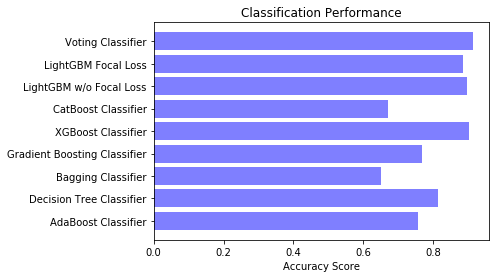

In [44]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

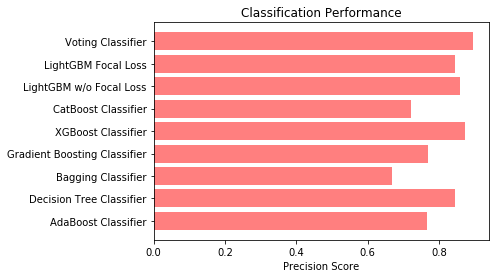

In [45]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

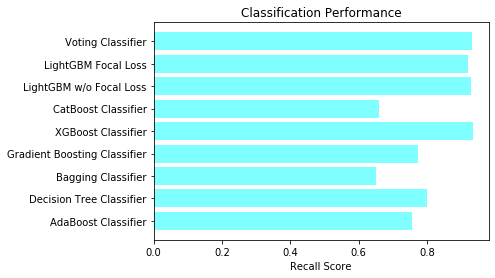

In [46]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

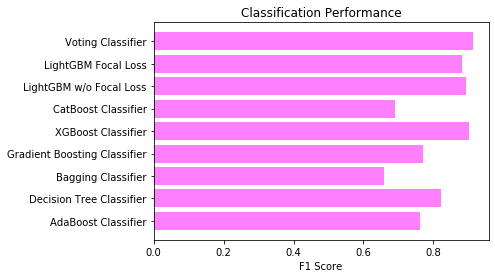

In [47]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

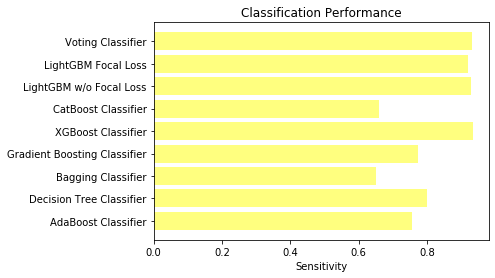

In [48]:
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity')
plt2.title('Classification Performance')
plt2.show()

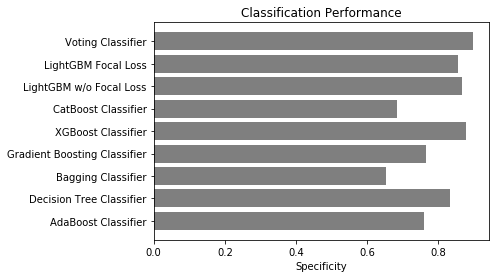

In [49]:
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='black')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

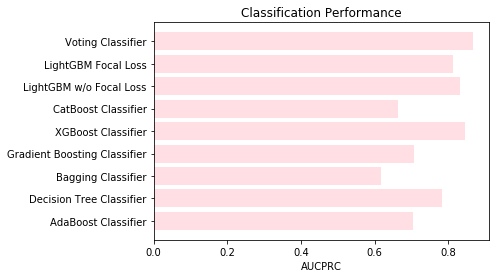

In [50]:
plt2.barh(y_pos, auprc, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUCPRC')
plt2.title('Classification Performance')
plt2.show()

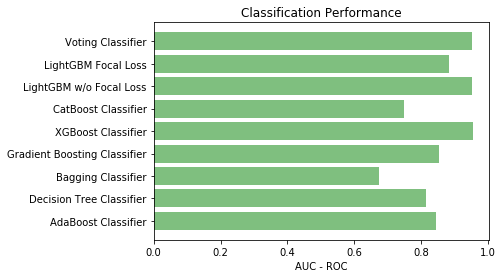

In [51]:
plt2.barh(y_pos, auroc, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC - ROC')
plt2.title('Classification Performance')
plt2.show()

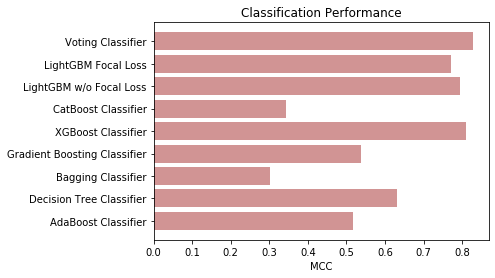

In [52]:
plt2.barh(y_pos, mcc, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('MCC')
plt2.title('Classification Performance')
plt2.show()